# Final Project Purwadhika

By: Refa Yudhatama Ramadhan & Dhimas Aditya Zulhajmi

Mentors: Mas Albert & Mas Achmad

**JCDS 1904**

## Business Problem Understanding

**Context**

Kampanye pemasaran adalah proses di mana sebuah bisnis atau organisasi mengiklankan produknya kepada klien saat ini dan di masa depan. Salah satu penerapan kampanye pemasaran untuk mendapatkan pelanggan adalah bank. 

Portugal Bank adalah bank swasta yang sudah beroperasi selama lebih dari 50 tahun. Bank ini menawarkan berbagai produk finansial, termasuk tabungan, deposito berjangka, pinjaman dan KPR. Meningkatnya kompetisi antar institusi finansial di Portugal mengharuskan Portugal Bank untuk berkompetisi dengan institusi lainnya guna meningkatkan market share dengan meningkatkan strategi marketing dari Portugal Bank

Portugal bank memiliki data-data atas nasabahnya, termasuk umur, pekerjaan, status pernikahan, pendidikan, status pinjaman, dan data-data lainnya. Divisi marketing memilih untuk menggunakan metode direct marketing campaign yang dimana bank akan menghubungi nasabah dan menawarkan produk deposito berjangka yang dimana menjadi fokus pada analisis ini. Bank ingin mengetahui nasabah mana yang sekiranya akan menyetujui tawaran deposito, sehingga kegiatan campaign dapat berjalan lebih efektif dan dapat memangkas biaya marketing.

Deposito berjangka, adalah salah satu produk simpanan yang dimana yang pencairannya hanya dapat dilakukan pada jangka waktu tertentu. Apabila seorang nasabah menyimpan uangnya pada produk deposito, maka bank dapat menginvestasikan kembali uang tersebut guna memperoleh pendapatan yang lebih. Di saat yang sama, nasabah juga mendapatkan bunga yang lebih tinggi dibandingkan tabungan biasa.

Untuk meraih efektifitas pada campaign marketing, Portugal Bank merekrut kami sebagai tim data scientist untuk membuat sebuah model machine learning guna memprediksi nasabah yang besar kemungkinannya akan menerima tawaran deposito berjangka yang merupakan program dari marketing campaign dari Portugal Bank. Dengan model machine learning, diharapkan dapat meningkatkan jumlah nasabah yang akan membeli produk deposito berjangka dan meningkatkan efektifitas strategi marketing campaign dari Portugal Bank. Untuk klien yang setuju untuk menaruh deposit, variabel target akan diisi dengan 'yes', jika tidak 'no'.

**Target:**

0: Menolak tawaran deposito

1: Menerima tawaran deposito

**Problem Statement**

Berdasarkan hasil dari marketing campaign pada tahun sebelumnya, Portugal Bank mengalami penurunan pendapatan pada produk deposito berjangka dan setelah dicari tahu penyebabnya, ditemukan bahwa adanya penurunan ketertarikan nasabah bank tersebut untuk menyimpan uangnya pada produk deposito dari Portugal Bank tersebut. 

Hal lain yang menyebabkan penurunan pendapatan adalah tingginya biaya marketing. Hal ini disebabkan pula karena belum adanya target campaign marketing yang baik atas penawaran deposito, sehingga campaign tidak dilakukan secara efektif dan banyak nasabah yang menolak tawaran, yang dimana menjadi sebuah kerugian bagi Bank.

**Goals**

Portugal Bank mengharapkan setelah aplikasi dari model machine learning, kegiatan marketing campaign atas penawaran deposito berjangka kepada nasabah Portugal Bank akan lebih efektif. Efektif disini adalah nasabah yang dihubungi oleh telemarketing adalah nasabah yang sudah terprediksi akan menerima tawaran, dan Bank mengeluarkan biaya campaign yang lebih sedikit daripada campaign sebelumnya.

**Analytic Approach**

Yang akan kita lakukan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan nasabah yang menerima tawaran deposito dan yang tidak.

Kemudian kita akan membangun model klasifikasi yang akan membantu bank untuk dapat memprediksi probabilitas seorang nasabah akan menerima tawaran deposito tersebut atau tidak.

**Metric Evaluation**

<img src='Matrix.png'>

Type 1 Error :  False Positive

Konsekuensi : Kerugian pada biaya campaign 

Type 2 Error :  False Negative

Konsekuensi : Kehilangan calon nasabah potensial

Untuk prediksi menggunakan machine learning, kami akan menggunakan Precision. Alasan atas penggunaan dari Precision adalah pada tahap problem statement diatas, kita memfokuskan untuk dapat meningkatkan efektifitas campaign, yang dimana efektif dalam artian nasabah-nasabah yang menjadi target dalam campaign adalah nasabah yang sudah terprediksi menerima tawaran, dan secara langsung dapat mengurangi biaya dari campaign.

Fokus kami adalah meningkatkan True Positive dan dapat mengurangi False Positive, yang dimana True Positive adalah nasabah-nasabah yang terprediksi menerima tawaran deposito dan benar menerima True Positive, dan mengurangi False Positive yang dimana nasabah yang diprediksi akan menerima tawaran deposito tetapi akhirnya menolak yang dimana merupakan sebuah cost pada campaign.

## Data Understanding 

Sumber Dataset : https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset?datasetId=473216&sortBy=voteCount

* Terdapat ketidakseimbangan pada dataset.
* Sebagian besar fitur pada dataset bersifat kategorikal, baik nominal maupun ordinal, dengan beberapa fitur memiliki kardinalitas yang tinggi.
* Setiap baris pada dataset merepresentasikan informasi kandidat nasabah yang pernah melakukan deposit di masa lalu.

## **Attribute Information**

|Feature|Data Type|Description|
| --- | --- | --- |
| age | int64 | Age of the Customer |
| job | Object | Type of customer occupation |
| marital | Object | Marital status of customers |
| education | Object | Last education of customers |
| default | Object | Customer's current creadit status |
| housing | Integer | Does customer in housing loan |
| loan | Object | Does customer has personal loan |
| contact | int64 | Contact communication type |
| month | int64 | Last contact month of year |
| day_of_week | Integer | Last contact day of the week |
| duration | Object | Last contact duration, in seconds |
| campaign | Object | Number of contacts performed during this campaign and for this client |
| pdays | Object | Number of days that passed by after the client was last contacted from a previous campaign |
| previous | Object | Number of contact performed before this campaign and for this client |
| poutcome | Object | Outcome of the previous marketing campaign |
| emp.var.rate | Object | Employment variation rate |
| cons.price.idx | Object | Consumer price index |
| cons.conf.idx | Object | Consumer confidence index |
| euribor3m | Object | Euro Interbank Offered Rate, 3 month rate |
| nr.employed | Object | number of employees, quarterly indicator |
| y | Object | Has the client subscribed a term deposit |

## Importing Libraries & Analyzing Dataframe

In [5]:
!pip install category_encoders

In [6]:
# Import Library
import pandas as pd
import numpy as np
import missingno

# Import Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Feature Engineering
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold,train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
# from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score

# Imbalance Dataset
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline

# Ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Reading Dataset
df = pd.read_csv('bank-additional-full.csv', sep = ';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [8]:
# Info Jumlah dan tipe data pada setiap kolom 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
# Melihat data unik pada tiap kolomnya
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,unique,uniqueSample
0,age,int64,0,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 5..."
1,job,object,0,12,"[housemaid, services, admin., blue-collar, tec..."
2,marital,object,0,4,"[married, single, divorced, unknown]"
3,education,object,0,8,"[basic.4y, high.school, basic.6y, basic.9y, pr..."
4,default,object,0,3,"[no, unknown, yes]"
5,housing,object,0,3,"[no, yes, unknown]"
6,loan,object,0,3,"[no, yes, unknown]"
7,contact,object,0,2,"[telephone, cellular]"
8,month,object,0,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, ..."
9,day_of_week,object,0,5,"[mon, tue, wed, thu, fri]"


In [10]:
# mengubah nama kolom 'y' menjadi 'deposit' agar lebih mudah dimengerti
df = df.rename(columns = {'y':'deposit'})

In [11]:
# melihat data unik pada kolom `job`
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [12]:
# menghilangkan titik pada data "admin"
df.loc[df['job']=='admin.', 'job'] = 'admin'

In [13]:
# melihat data unik pada kolom education
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [14]:
# menghilangkan titik pada tengah-tengah data pada kolom `education`
df['education'] = df['education'].str.replace('.',' ')

Pada tahap ini, kita menghilangkan tanda titik pada data-data yang dimana tanda titik tersebut dapat menyulitkan analisis kedepannya, yang dimana dapat membantu untuk menghindari terjadinya kesalahan penulisan pada analisis dan penulisan masing-masin data menjadi sama.

# Exploratory Data Analysis (EDA)

In [15]:
# membuat copy dari dataset
train_df = df.copy()

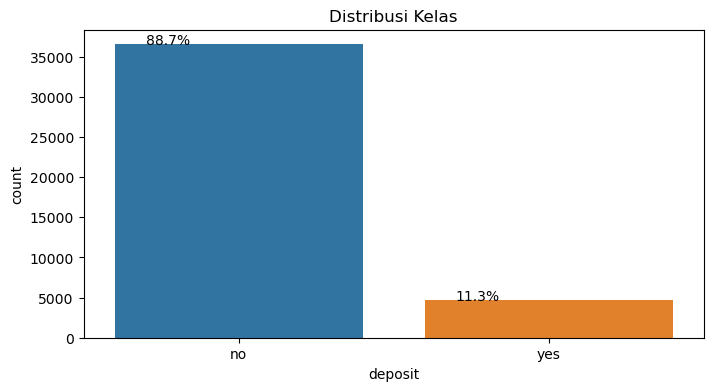

In [16]:
# Mencari tahu apakah target balance atau imbalance
plt.figure(figsize=(8,4))
Y = train_df["deposit"]
total = len(Y)*1.
ax=sns.countplot(x="deposit", data=train_df)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

plt.title('Distribusi Kelas')
plt.show()

Kita dapat melihat bahwa kelas target imbalance, yang dimana 88.7% menolak tawaran deposito dan 11.3% menerima tawaran deposito. Perbedaan yang sangat jauh antara yang menerima dan yang menolak, yang dimana dapat kita simpulkan bahwa pada campaign sebelumnya bank tidak dapat mendapatkan banyak depositor baru.

In [17]:
train_df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin,married,university degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [18]:
# Melihat jumlah data unik dari masing-masing kolom
print("Job:",train_df.job.value_counts(),sep = '\n')
print("-"*40)
print("Marital:",train_df.marital.value_counts(),sep = '\n')
print("-"*40)
print("Education:",train_df.education.value_counts(),sep = '\n')
print("-"*40)
print("Default:",train_df.default.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",train_df.housing.value_counts(),sep = '\n')
print("-"*40)
print("Personal loan:",train_df.loan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",train_df.contact.value_counts(),sep = '\n')
print("-"*40)
print("Month:",train_df.month.value_counts(),sep = '\n')
print("-"*40)
print("Day:",train_df.day_of_week.value_counts(),sep = '\n')
print("-"*40)
print("Previous outcome:",train_df.poutcome.value_counts(),sep = '\n')
print("-"*40)
print("Outcome of this campaign:",train_df.deposit.value_counts(),sep = '\n')
print("-"*40)

Job:
admin            10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
----------------------------------------
Marital:
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
----------------------------------------
Education:
university degree      12168
high school             9515
basic 9y                6045
professional course     5243
basic 4y                4176
basic 6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
----------------------------------------
Default:
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
----------------------------------------
Housing loan:
yes        21576
no         18622
unknown      

Data yang diberikan adalah frekuensi dari beberapa variabel yang berkaitan dengan kampanye pemasaran. Berikut adalah penjelasan dari masing-masing variabel:

* Job: variabel ini menunjukkan jenis pekerjaan dari individu yang dihubungi dalam kampanye pemasaran. Terdapat 12 jenis pekerjaan yang terdaftar, dengan frekuensi tertinggi dimiliki oleh pekerja administratif (admin) sebanyak 10422.

* Marital: variabel ini menunjukkan status pernikahan dari individu yang dihubungi dalam kampanye pemasaran. Terdapat 4 kategori status pernikahan yang terdaftar, dengan frekuensi tertinggi dimiliki oleh individu yang sudah menikah (married) sebanyak 24928.

* Education: variabel ini menunjukkan tingkat pendidikan dari individu yang dihubungi dalam kampanye pemasaran. Terdapat 8 kategori tingkat pendidikan yang terdaftar, dengan frekuensi tertinggi dimiliki oleh individu yang memiliki gelar universitas (university degree) sebanyak 12168.

* Default: variabel ini menunjukkan apakah individu yang dihubungi dalam kampanye pemasaran memiliki tunggakan pembayaran atau tidak. Terdapat 3 kategori dalam variabel ini, dengan frekuensi tertinggi dimiliki oleh individu yang tidak memiliki tunggakan (no) sebanyak 32588.

* Housing loan: variabel ini menunjukkan apakah individu yang dihubungi dalam kampanye pemasaran memiliki pinjaman rumah atau tidak. Terdapat 3 kategori dalam variabel ini, dengan frekuensi tertinggi dimiliki oleh individu yang memiliki pinjaman rumah (yes) sebanyak 21576.

* Personal loan: variabel ini menunjukkan apakah individu yang dihubungi dalam kampanye pemasaran memiliki pinjaman pribadi atau tidak. Terdapat 3 kategori dalam variabel ini, dengan frekuensi tertinggi dimiliki oleh individu yang tidak memiliki pinjaman pribadi (no) sebanyak 33950.

* Contact: variabel ini menunjukkan jenis kontak yang digunakan untuk menghubungi individu dalam kampanye pemasaran. Terdapat 2 kategori dalam variabel ini, dengan frekuensi tertinggi dimiliki oleh kontak melalui ponsel (cellular) sebanyak 26144.

* Month: variabel ini menunjukkan bulan di mana individu dihubungi dalam kampanye pemasaran. Terdapat 10 kategori dalam variabel ini, dengan frekuensi tertinggi dimiliki oleh bulan Mei (may) sebanyak 13769.

* Day: variabel ini menunjukkan hari di mana individu dihubungi dalam kampanye pemasaran. Terdapat 5 kategori dalam variabel ini, dengan frekuensi tertinggi dimiliki oleh hari Kamis (thu) sebanyak 8623.

* Previous outcome: variabel ini menunjukkan hasil dari kontak sebelumnya dengan individu dalam kampanye pemasaran. Terdapat 3 kategori dalam variabel ini, dengan frekuensi tertinggi dimiliki oleh hasil "nonexistent" (tidak ada kontak sebelumnya) sebanyak 35563.

* Outcome of this campaign: variabel ini menunjukkan hasil dari kampanye pemasaran yang dilakukan pada responden, dengan nilai 0 dan 1. Jumlah kemunculan nilai 0 sebanyak 36548 menunjukkan bahwa sebanyak 36548 responden tidak tertarik atau tidak merespon tawaran produk atau jasa yang ditawarkan dalam kampanye pemasaran tersebut. Sedangkan, jumlah kemunculan nilai 1 sebanyak 4640 menunjukkan bahwa sebanyak 4640 responden tertarik atau merespon tawaran produk atau jasa yang ditawarkan dalam kampanye pemasaran tersebut.

# Data Cleaning

In [19]:
# Melihat apakah ada data yang kosong pada dataset
train_df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

In [20]:
# Melihat apakah ada data yang duplikat
train_df.duplicated().sum()

12

In [21]:
# Terdapat 12 data duplikat yang akan kita hapus
train_df = train_df.drop_duplicates()
train_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic 4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin,married,basic 6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


* Setelah dilakukan pengecekan atas missing value tidak ditemukan adanya missing value pada dataset ini.
* Setelah dilakukan pengecekan atas data duplikat, ditemukan ada 12 data duplikat yang dimana akan kita drop.

In [22]:
# Function untuk melihat outliers
columns = train_df[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

iqrx = []
bottom = []
upper = []

for i in columns:
    q1 = columns.quantile(0.25)
    q3 = columns.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    # print(f'IQR: {iqr}')
    iqrx.append(iqr[i])

    bottom_limit = q1 - limit
    upper_limit = q3 + limit
    # print(f'Bottom Limit: {bottom_limit}')
    # print(f'Upper Limit: {upper_limit}')
    bottom.append(bottom_limit[i])
    upper.append(upper_limit[i])

iqr_bottom_upper = pd.DataFrame({
    'Columns' : ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'],
    'IQR' : iqrx,
    'Bottom Limit' : bottom,
    'Upper Limit' : upper
    })

iqr_bottom_upper

,Columns,IQR,Bottom Limit,Upper Limit
0,age,15.000,9.5000,69.5000
1,duration,217.000,-223.5000,644.5000
2,campaign,2.000,-2.0000,6.0000
3,pdays,0.000,999.0000,999.0000
4,previous,0.000,0.0000,0.0000
5,emp.var.rate,3.200,-6.6000,6.2000
6,cons.price.idx,0.919,91.6965,95.3725
7,cons.conf.idx,6.300,-52.1500,-26.9500
8,euribor3m,3.617,-4.0815,10.3865
9,nr.employed,129.000,4905.6000,5421.6000


## **Numerical Features**

### **Age**

In [23]:
# Mencari tahu outlier pada kolom age
train_df['age'].describe()

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [24]:
q1 = train_df['age'].quantile(0.25)
q3 = train_df['age'].quantile(0.75)
iqr = q3 - q1
limit = iqr*1.5

bottom_limit = q1 - limit
upper_limit = q3 + limit

print(f'''
Age
{'-'*10}
IQR = {iqr}
Batas Bawah = {bottom_limit}
Batas Atas = {upper_limit}
''')


Age
----------
IQR = 15.0
Batas Bawah = 9.5
Batas Atas = 69.5



* Pada kolom age, nasabah memiliki usia rata-rata 40 tahun, dimana pada umur 40 tahun, di asumsikan telah memiliki pekerjaan yang tetap dan pendapatan yang stabil sehingga menjadi target yang benar pada campaign.
* Usia paling muda adalah 17 tahun dan usia paling tua adalah 98 tahun. Pendapat kami, pada usia 17 tahun, seseorang sudah secara legal bekerja, dan memiliki pendapatan sehingga dapat menjadi pertimbangan menjadi target campaign. Sedangkan nasabah dengan umur 98 tahun, merupakan nasabah yang sudah pensiun dan tidak dapat bekerja, dan seperti boxplot diatas termasuk sebagai outlier.
* Pada tabel diatas, age memiliki batas bawah pada usia 9.5 tahun dan batas atas pada usia 69.5 tahun. Usia 9.5 tahun dapat dipertimbangkan, dikarenakan anak-anak dapat memiliki rekening walaupun masih diatasnamakan orang tuanya. Sedangkan melihat dari usia pensiun di Portugal yaitu 66 Tahun dan 7 Bulan (2023), maka usia 69.5 tahun masih masuk akal untuk menjadi target campaign.
* Oleh karena itu, data usia yang merupakan outlier, yaitu diatas 69.5 tahun, akan kami drop.

In [25]:
# Mengetahui jumlah data usia diatas 69.5 tahun
train_df[(train_df['age'] > 69.5)]['age'].count()

468

In [26]:
# Terdapat 468 data usia diatas 69.5 tahun, dan kita akan menghapus data nasabah dengan usia diatas 69.5 tahun
train_df = train_df[(train_df['age'] <= 69.5)]

### **Duration**

In [27]:
# Mencari tahu outlier pada kolom duration
train_df['duration'].describe()

count    40708.000000
mean       258.135207
std        259.607003
min          0.000000
25%        102.000000
50%        179.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [28]:
q1 = train_df['duration'].quantile(0.25)
q3 = train_df['duration'].quantile(0.75)
iqr = q3 - q1
limit = iqr*1.5

bottom_limit = q1 - limit
upper_limit = q3 + limit

print(f'''
Duration
{'-'*10}
IQR = {iqr}
Batas Bawah = {bottom_limit}
Batas Atas = {upper_limit}
''')


Duration
----------
IQR = 217.0
Batas Bawah = -223.5
Batas Atas = 644.5



* Pada kolom duration, yang dimana menunjukkan durasi kontak terakhir dengan satuan detik, memperlihatkan banyak outlier berdasarkan boxplot diatas. Rata-rata durasi kontak adalah 258.3 detik atau sekitar 4.3 menit.
* Durasi kontak paling pendek adalah 0 detik, atau dapat kita asumsikan tidak terdapat kontak. Sedangkan kontak paling lama adalah 4,918 detik atau sekitar hampir 1.5 jam. Hal tersebut bisa saja terjadi tetapi akan sangat jarang terjadi.
* Batas atas dari kolom `duration` adalah 644.5 detik atau sekitar hampir 11 menit, yang dimana durasi masih masuk akal apabila nasabah meminta penjelasan terkait produk deposito. Dengan itu, kami akan menghapus outliers yaitu data pada kolom `duration` diatas 644.5 detik.

In [29]:
# Mengetahui jumlah data durasi diatas 644.5 detik
train_df[(train_df['duration'] > 644.5)]['duration'].count()

2935

In [30]:
# Terdapat 2,963 data durasi diatas 644.5 detik, dan kita akan menghapus data nasabah dengan durasi kontak diatas 644.5 detik
train_df = train_df[(train_df['duration'] <= 644.5)]

### **Campaign**

In [31]:
# Mencari tahu outlier pada kolom duration
train_df['campaign'].describe()

count    37773.000000
mean         2.583194
std          2.820224
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [32]:
q1 = train_df['campaign'].quantile(0.25)
q3 = train_df['campaign'].quantile(0.75)
iqr = q3 - q1
limit = iqr*1.5

bottom_limit = q1 - limit
upper_limit = q3 + limit

print(f'''
Campaign
{'-'*10}
IQR = {iqr}
Batas Bawah = {bottom_limit}
Batas Atas = {upper_limit}
''')


Campaign
----------
IQR = 2.0
Batas Bawah = -2.0
Batas Atas = 6.0



* Kolom campaign yang menunjukkan berapa kali kontak yang dilakukan selama masa campaign, menunjukkan bahwa rata-rata nasabah dihubungi sebanyak 2.56 kali, atau bisa kita bulatkan menjadi 3 kali.
* Dengan jumlah kontak paling sedikit 1 kali dan paling banyak 56 kali, tentu 56 kali kontak sangat tidak masuk akal. Tentu dengan kontak sebanyak itu sangat mengganggu nasabah pada kesehariannya.
* Dengan batas atas 6 kali kontak, yang dimana masih masuk akal, kita akan menghapus data pada kolom `campaign` dengan nilai diatas 6.

In [33]:
# Mengetahui jumlah data pada kolom `campaign` diatas 6 kali
train_df[(train_df['campaign'] > 6)]['campaign'].count()

2249

In [34]:
# Terdapat 2,406 data kontak diatas 6 kali, dan kita akan menghapus data nasabah dengan jumlah kontak diatas 6 kali
train_df = train_df[(train_df['campaign'] <= 6)]

### **Pdays**

In [35]:
# Mencari tahu outlier pada kolom pdays
train_df['pdays'].describe()

count    35524.000000
mean       963.555653
std        184.232052
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

Melihat pada dataset kolom `pdays`, kita dapat melihat bahwa banyak data dengan value '999', yang dimana pada penjelasan dataset, value 999 berarti belum adanya kontak dengan nasabah tersebut, dimana dapat kita ubah dengan value 0 pada bagian data cleaning ini.

In [36]:
# Mengubah nilai 999 menjadi 0 pada kolom `pdays`

train_df['pdays'] = train_df['pdays'].replace({999: 0})

In [37]:
# Mencari tahu outlier pada kolom pdays setelah mengganti value
train_df['pdays'].describe()

count    35524.000000
mean         0.214137
std          1.330036
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         27.000000
Name: pdays, dtype: float64

In [38]:
q1 = train_df['pdays'].quantile(0.25)
q3 = train_df['pdays'].quantile(0.75)
iqr = q3 - q1
limit = iqr*1.5

bottom_limit = q1 - limit
upper_limit = q3 + limit

print(f'''
pdays
{'-'*10}
IQR = {iqr}
Batas Bawah = {bottom_limit}
Batas Atas = {upper_limit}
''')


pdays
----------
IQR = 0.0
Batas Bawah = 0.0
Batas Atas = 0.0



* Terlihat bahwa rata-rata pada kolom `pdays` adalah 0.2, yang dimana dapat kita asumsikan rata-rata nya adalah 0 dimana banyak nasabah yang belum pernah dihubungi sehingga tidak ada data berapa hari nasabah telah dihubungi dari campaign sebelumnya.
* Nilai Batas Bawah dan Batas Atas yang tidak memperlihatkan value yang baik, maka dari itu kita tidak akan menghapus data outlier, dan menjadi pertimbangan untuk tidak mengikutsertakan feature ini pada prediksi pada tahap feature importance.

### **Previous**

In [39]:
train_df['previous'].describe()

count    35524.000000
mean         0.175008
std          0.493375
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

In [40]:
q1 = train_df['previous'].quantile(0.25)
q3 = train_df['previous'].quantile(0.75)
iqr = q3 - q1
limit = iqr*1.5

bottom_limit = q1 - limit
upper_limit = q3 + limit

print(f'''
previous
{'-'*10}
IQR = {iqr}
Batas Bawah = {bottom_limit}
Batas Atas = {upper_limit}
''')


previous
----------
IQR = 0.0
Batas Bawah = 0.0
Batas Atas = 0.0



nilai IQR = 0.0 dan Batas Bawah = 0.0 serta Batas Atas = 0.0 menunjukkan bahwa seluruh data yang diolah memiliki nilai yang sama atau homogen. Hal ini artinya, tidak terdapat variabilitas dalam kumpulan data sehingga tidak diperlukan batas atas atau batas bawah untuk menentukan outlier atau nilai-nilai ekstrim.

### **empr.var.rate**

In [41]:
train_df['emp.var.rate'].describe()

count    35524.000000
mean         0.064948
std          1.567057
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

In [42]:
q1 = train_df['emp.var.rate'].quantile(0.25)
q3 = train_df['emp.var.rate'].quantile(0.75)
iqr = q3 - q1
limit = iqr*1.5

bottom_limit = q1 - limit
upper_limit = q3 + limit

print(f'''
emp.var.rate
{'-'*10}
IQR = {iqr}
Batas Bawah = {bottom_limit}
Batas Atas = {upper_limit}
''')


emp.var.rate
----------
IQR = 3.2
Batas Bawah = -6.6000000000000005
Batas Atas = 6.200000000000001



* IQR (Interquartile Range) adalah selisih antara kuartil atas dan kuartil bawah pada distribusi data variabel "emp.var.rate". IQR digunakan sebagai ukuran variabilitas atau penyebaran data. Nilai IQR = 3.2 menunjukkan bahwa sebagian besar data variabel ini terkonsentrasi dalam rentang 3.2.

* Batas Bawah adalah nilai terendah dari distribusi data variabel "emp.var.rate" setelah diberikan penanganan menggunakan teknik IQR. Nilai Batas Bawah = -6.6 menunjukkan bahwa nilai terendah dari data variabel ini adalah -6.6.

* Batas Atas adalah nilai tertinggi dari distribusi data variabel "emp.var.rate" setelah diberikan penanganan menggunakan teknik IQR. Nilai Batas Atas = 6.2 menunjukkan bahwa nilai tertinggi dari data variabel ini adalah 6.2.

### **cons.price.idx**

In [43]:
train_df['cons.price.idx'].describe()

count    35524.000000
mean        93.566412
std          0.577002
min         92.201000
25%         93.075000
50%         93.444000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64

In [44]:
q1 = train_df['cons.price.idx'].quantile(0.25)
q3 = train_df['cons.price.idx'].quantile(0.75)
iqr = q3 - q1
limit = iqr*1.5

bottom_limit = q1 - limit
upper_limit = q3 + limit

print(f'''
cons.price.idx
{'-'*10}
IQR = {iqr}
Batas Bawah = {bottom_limit}
Batas Atas = {upper_limit}
''')


cons.price.idx
----------
IQR = 0.9189999999999969
Batas Bawah = 91.69650000000001
Batas Atas = 95.3725



* Count (jumlah observasi) adalah 35524, artinya terdapat 35524 baris data pada variabel "cons.price.idx".

* Mean (rata-rata) adalah 93.566412. Nilai ini menunjukkan rata-rata dari seluruh nilai pada variabel "cons.price.idx".

* Std (standar deviasi) adalah 0.577002. Nilai ini menunjukkan seberapa jauh variabilitas data dari rata-rata pada variabel "cons.price.idx". Semakin besar nilai standar deviasi, semakin besar variabilitas data.

* Min (nilai terkecil) adalah 92.201000. Nilai ini menunjukkan nilai terendah dari seluruh nilai pada variabel "cons.price.idx".

* Quartile 1 (25%) adalah 93.075000. Nilai ini menunjukkan nilai tengah dari separuh bagian data terkecil pada variabel "cons.price.idx".

* Quartile 2 (50%) adalah 93.444000. Nilai ini menunjukkan nilai tengah dari seluruh nilai pada variabel "cons.price.idx".

* Quartile 3 (75%) adalah 93.994000. Nilai ini menunjukkan nilai tengah dari separuh bagian data terbesar pada variabel "cons.price.idx".

* Max (nilai terbesar) adalah 94.767000. Nilai ini menunjukkan nilai tertinggi dari seluruh nilai pada variabel "cons.price.idx".

### **cons.conf.idx**

In [45]:
train_df['cons.conf.idx'].describe()

count    35524.000000
mean       -40.523094
std          4.623744
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64

In [46]:
q1 = train_df['cons.conf.idx'].quantile(0.25)
q3 = train_df['cons.conf.idx'].quantile(0.75)
iqr = q3 - q1
limit = iqr*1.5

bottom_limit = q1 - limit
upper_limit = q3 + limit

print(f'''
cons.conf.idx
{'-'*10}
IQR = {iqr}
Batas Bawah = {bottom_limit}
Batas Atas = {upper_limit}
''')


cons.conf.idx
----------
IQR = 6.300000000000004
Batas Bawah = -52.150000000000006
Batas Atas = -26.949999999999992



* Nilai IQR = 6.3 menunjukkan bahwa sebagian besar data variabel ini terkonsentrasi dalam rentang 6.3.

* Batas Bawah adalah nilai terendah dari distribusi data variabel "cons.conf.idx" setelah diberikan penanganan menggunakan teknik IQR. Nilai Batas Bawah = -52.15 menunjukkan bahwa nilai terendah dari data variabel ini adalah -52.15.

* Batas Atas adalah nilai tertinggi dari distribusi data variabel "cons.conf.idx" setelah diberikan penanganan menggunakan teknik IQR. Nilai Batas Atas = -26.95 menunjukkan bahwa nilai tertinggi dari data variabel ini adalah -26.95.

Dengan adanya nilai IQR, Batas Bawah, dan Batas Atas, kita dapat menentukan outlier atau nilai-nilai ekstrim yang terlalu rendah atau terlalu tinggi dalam distribusi data variabel "cons.conf.idx" 

### **euribor3m**

In [47]:
train_df['euribor3m'].describe()

count    35524.000000
mean         3.609190
std          1.731433
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

In [48]:
q1 = train_df['euribor3m'].quantile(0.25)
q3 = train_df['euribor3m'].quantile(0.75)
iqr = q3 - q1
limit = iqr*1.5

bottom_limit = q1 - limit
upper_limit = q3 + limit

print(f'''
euribor3m
{'-'*10}
IQR = {iqr}
Batas Bawah = {bottom_limit}
Batas Atas = {upper_limit}
''')


euribor3m
----------
IQR = 3.617
Batas Bawah = -4.081499999999999
Batas Atas = 10.3865



* Nilai IQR = 3.617 menunjukkan bahwa sebagian besar data variabel ini terkonsentrasi dalam rentang 3.617.

* Batas Bawah adalah nilai terendah dari distribusi data variabel "euribor3m" setelah diberikan penanganan menggunakan teknik IQR. Nilai Batas Bawah = -4.0815 menunjukkan bahwa nilai terendah dari data variabel ini adalah -4.0815.

* Batas Atas adalah nilai tertinggi dari distribusi data variabel "euribor3m" setelah diberikan penanganan menggunakan teknik IQR. Nilai Batas Atas = 10.3865 menunjukkan bahwa nilai tertinggi dari data variabel ini adalah 10.3865.

Dengan adanya nilai IQR, Batas Bawah, dan Batas Atas, kita dapat menentukan outlier atau nilai-nilai ekstrim yang terlalu rendah atau terlalu tinggi dalam distribusi data variabel "euribor3m". Nilai-nilai di luar Batas Bawah atau Batas Atas dapat dianggap sebagai outlier atau nilai-nilai ekstrim yang perlu diperiksa lebih lanjut.

### **nr.employed**

In [49]:
train_df['nr.employed'].describe()

count    35524.000000
mean      5166.691245
std         71.495359
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

In [50]:
q1 = train_df['nr.employed'].quantile(0.25)
q3 = train_df['nr.employed'].quantile(0.75)
iqr = q3 - q1
limit = iqr*1.5

bottom_limit = q1 - limit
upper_limit = q3 + limit

print(f'''
nr.employed
{'-'*10}
IQR = {iqr}
Batas Bawah = {bottom_limit}
Batas Atas = {upper_limit}
''')


nr.employed
----------
IQR = 129.0
Batas Bawah = 4905.6
Batas Atas = 5421.6



* Nilai IQR = 129.0 menunjukkan bahwa sebagian besar data variabel ini terkonsentrasi dalam rentang 129.

* Batas Bawah adalah nilai terendah dari distribusi data variabel "nr.employed" setelah diberikan penanganan menggunakan teknik IQR. Nilai Batas Bawah = 4905.6 menunjukkan bahwa nilai terendah dari data variabel ini adalah 4905.6.

* Batas Atas adalah nilai tertinggi dari distribusi data variabel "nr.employed" setelah diberikan penanganan menggunakan teknik IQR. Nilai Batas Atas = 5421.6 menunjukkan bahwa nilai tertinggi dari data variabel ini adalah 5421.6.

Dengan adanya nilai IQR, Batas Bawah, dan Batas Atas, kita dapat menentukan outlier atau nilai-nilai ekstrim yang terlalu rendah atau terlalu tinggi dalam distribusi data variabel "nr.employed". Nilai-nilai di luar Batas Bawah atau Batas Atas dapat dianggap sebagai outlier atau nilai-nilai ekstrim yang perlu diperiksa lebih lanjut.

## **Categorical Features**

### **Job**

In [51]:
train_df['job'].value_counts()

admin            9104
blue-collar      8074
technician       5884
services         3450
management       2545
entrepreneur     1270
self-employed    1221
retired          1135
housemaid         896
unemployed        887
student           779
unknown           279
Name: job, dtype: int64

* Pekerjaan tidak menjadi poin yang menentukan apakah seseorang akan menerima tawaran deposito atau tidak, tetapi dari pekerjaan dapat menentukan kemampuan finansial seseorang yang secara tidak langsung mempengaruhi kemampuan menabung seseorang dan keputusan seseorang untuk melakukan deposit.
* Maka dari itu, value `unknown` pada kolom `job` akan kami drop.

In [52]:
# Drop value unknown pada kolom job
train_df['job'] = train_df[train_df['job'] != 'unknown']['job']

In [53]:
train_df['job'].value_counts()

admin            9104
blue-collar      8074
technician       5884
services         3450
management       2545
entrepreneur     1270
self-employed    1221
retired          1135
housemaid         896
unemployed        887
student           779
Name: job, dtype: int64

### **Marital**

In [54]:
train_df['marital'].value_counts()

married     21484
single      10074
divorced     3904
unknown        62
Name: marital, dtype: int64

* Status pernikahan dapat menentukan apakah sudah memiliki tanggungan apa tidak. Apabila sudah menikah, tentu keuangan menjadi salah satu faktor yang dapat menentukan apakah seseorang akan menerima tawaran deposito atau tidak. Dikarenakan pada produk deposito uang akan ditahan dalam tempo, kebutuhan keluarga tentu menjadi prioritas.
* Maka dari itu, value `unknown` pada kolom `marital` akan kami drop.

In [55]:
# Drop value unknown pada kolom marital
train_df['marital'] = train_df[train_df['marital'] != 'unknown']['marital']

In [56]:
train_df['marital'].value_counts()

married     21484
single      10074
divorced     3904
Name: marital, dtype: int64

### **Education**

In [57]:
train_df['education'].value_counts()

university degree      10548
high school             8278
basic 9y                5293
professional course     4548
basic 4y                3412
basic 6y                1973
unknown                 1458
illiterate                14
Name: education, dtype: int64

In [58]:
# Melihat apakah ada illiterate yang menerima tawaran deposito
train_df[train_df['education'] == 'illiterate']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
5393,45,blue-collar,married,illiterate,unknown,no,yes,telephone,may,fri,...,2,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
12383,51,admin,married,illiterate,unknown,no,no,cellular,jul,mon,...,4,0,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
14445,55,blue-collar,married,illiterate,no,yes,no,cellular,jul,tue,...,3,0,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
14486,55,blue-collar,married,illiterate,no,no,no,cellular,jul,tue,...,2,0,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
17739,54,blue-collar,married,illiterate,unknown,yes,yes,cellular,jul,tue,...,1,0,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
22402,45,blue-collar,married,illiterate,no,yes,no,cellular,aug,fri,...,1,0,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
22642,44,blue-collar,married,illiterate,no,no,no,cellular,aug,fri,...,1,0,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
26680,34,self-employed,married,illiterate,no,yes,no,cellular,nov,thu,...,1,0,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
26689,34,self-employed,married,illiterate,no,yes,no,cellular,nov,thu,...,1,0,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,yes
26756,34,self-employed,married,illiterate,no,yes,no,cellular,nov,thu,...,1,0,1,failure,-0.1,93.200,-42.0,4.076,5195.8,no


* Tingkat pendidikan seseorang mungkin tidak secara langsung mempengaruhi kemampuan mereka untuk berlangganan deposito. Namun, pendidikan dapat secara tidak langsung mempengaruhi situasi keuangan seseorang, yang dapat mempengaruhi kemampuan mereka untuk menabung dan berlangganan deposito.
* Illiterate atau orang-orang buta-huruf, apabila kita lihat diatas hanya sedikit yang menerima tawaran pekerjaan. Tanpa melihat bidang pekerjaannya, kita dapat menyimpulkan bahwa illiterate memiliki tingkat penerimaan tawaran yang rendah. Karena itu diputuskan untuk kami drop.
* Maka dari itu, value `unknown` dan `illiterate` pada kolom `education` akan kami hapus.

In [59]:
# Drop value unknown dan illiterate pada kolom education
train_df['education'] = train_df[train_df['education'] != 'unknown']['education']
train_df['education'] = train_df[train_df['education'] != 'illiterate']['education']

In [60]:
train_df['education'].value_counts()

university degree      10548
high school             8278
basic 9y                5293
professional course     4548
basic 4y                3412
basic 6y                1973
Name: education, dtype: int64

# Data Distribution

In [61]:
# Normality test feature menggunakan chisquare 
from scipy.stats import chisquare

hasil = []

for i in df.columns:
    observed_freq = df[i].value_counts()
    expected_freq = [len(df[i]) / len(observed_freq)] * len(observed_freq)
    # hitung nilai chi-square dan p-value
    chi2, pval = chisquare(observed_freq, expected_freq)
    if pval > 0.05:
        hasil.append('Distribusi merata')
    else:
        hasil.append('Tidak terdistribusi merata')

pd.DataFrame({'Kolom':df.columns, 'Distribusi':hasil})

,Kolom,Distribusi
0,age,Tidak terdistribusi merata
1,job,Tidak terdistribusi merata
2,marital,Tidak terdistribusi merata
3,education,Tidak terdistribusi merata
4,default,Tidak terdistribusi merata
5,housing,Tidak terdistribusi merata
6,loan,Tidak terdistribusi merata
7,contact,Tidak terdistribusi merata
8,month,Tidak terdistribusi merata
9,day_of_week,Tidak terdistribusi merata


* Age: Tidak terdistribusi merata artinya jumlah responden pada setiap kelompok usia tidak sama banyak. Hal ini menunjukkan adanya kemungkinan pengaruh usia terhadap variabel lain seperti tingkat pendapatan atau minat terhadap produk/jasa yang ditawarkan.

* Job: Tidak terdistribusi merata artinya jumlah responden pada setiap jenis pekerjaan tidak sama banyak. Hal ini dapat menunjukkan adanya preferensi tertentu terhadap jenis pekerjaan pada kelompok responden tertentu.

* Marital: Tidak terdistribusi merata artinya jumlah responden pada setiap status perkawinan tidak sama banyak. Hal ini dapat menunjukkan adanya preferensi tertentu terhadap status perkawinan pada kelompok responden tertentu.

* Education: Tidak terdistribusi merata artinya jumlah responden pada setiap tingkat pendidikan tidak sama banyak. Hal ini dapat menunjukkan adanya preferensi tertentu terhadap tingkat pendidikan pada kelompok responden tertentu.

* Default: Tidak terdistribusi merata artinya jumlah responden pada setiap kategori default (peminjam gagal bayar) tidak sama banyak. Hal ini dapat menunjukkan adanya preferensi tertentu terhadap kategori default pada kelompok responden tertentu.

* Housing: Tidak terdistribusi merata artinya jumlah responden pada setiap kategori housing loan (pinjaman rumah) tidak sama banyak. Hal ini dapat menunjukkan adanya preferensi tertentu terhadap kategori housing loan pada kelompok responden tertentu.

* Loan: Tidak terdistribusi merata artinya jumlah responden pada setiap kategori personal loan (pinjaman pribadi) tidak sama banyak. Hal ini dapat menunjukkan adanya preferensi tertentu terhadap kategori personal loan pada kelompok responden tertentu.

* Contact: Tidak terdistribusi merata artinya jumlah responden pada setiap metode kontak (cellular atau telephone) tidak sama banyak. Hal ini dapat menunjukkan adanya preferensi tertentu terhadap metode kontak pada kelompok responden tertentu.

* Month: Tidak terdistribusi merata artinya jumlah responden pada setiap bulan tidak sama banyak. Hal ini dapat menunjukkan adanya preferensi tertentu terhadap bulan pada kelompok responden tertentu.

* Day of Week: Tidak terdistribusi merata artinya jumlah responden pada setiap hari dalam seminggu tidak sama banyak. Hal ini dapat menunjukkan adanya preferensi tertentu terhadap hari dalam seminggu pada kelompok responden tertentu.

Perbedaan jumlah responden pada setiap kategori ini dapat memberikan wawasan tentang preferensi atau kecenderungan pada kelompok responden tertentu, sehingga dapat digunakan untuk menyusun strategi pemasaran yang lebih efektif dan tepat sasaran.

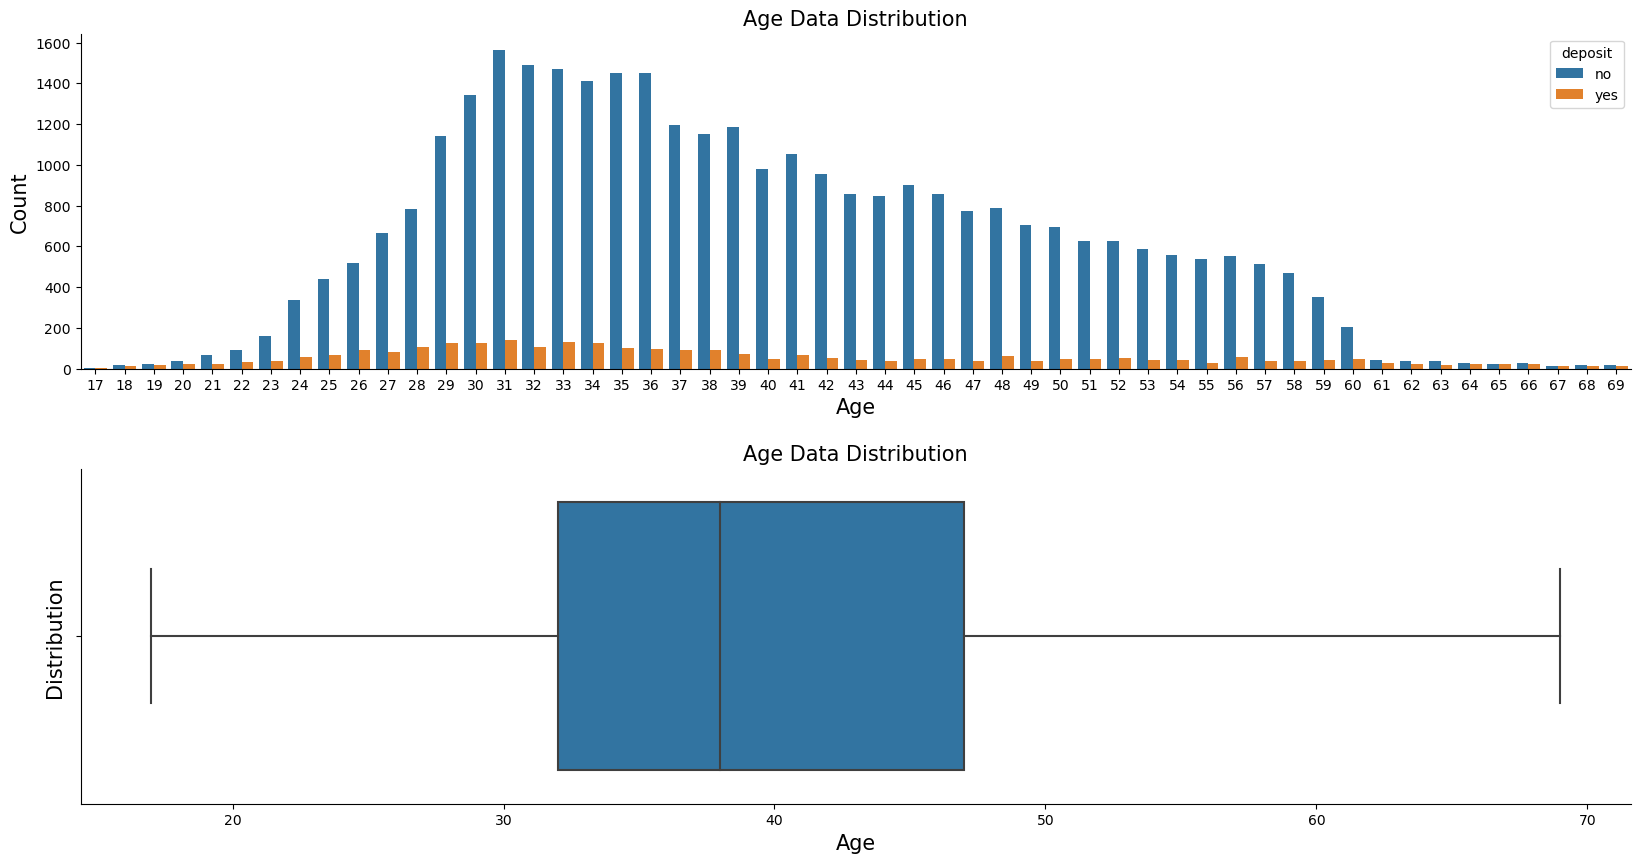

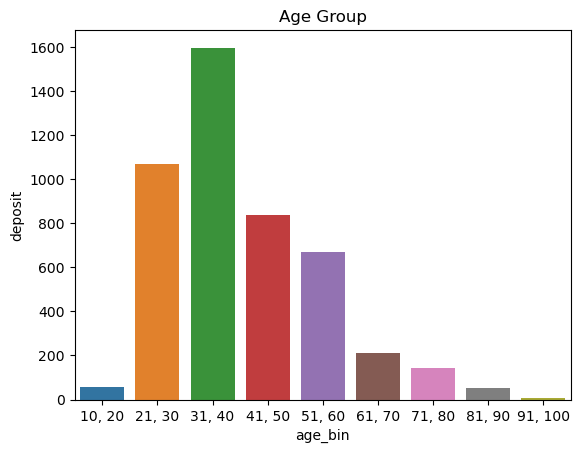

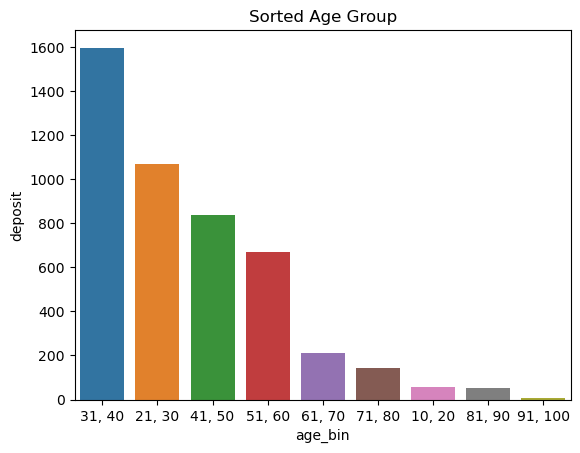

In [62]:
# Age Data Distribution 
fig = plt.figure(figsize=(20, 10))

# Add the first subplot (top plot)
ax1 = plt.subplot(2, 1, 1)
sns.countplot(x='age',hue = 'deposit', data=train_df, ax=ax1)
ax1.set_xlabel('Age', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.set_title('Age Data Distribution', fontsize=15)
sns.despine()

# Add the second subplot (bottom plot)
ax2 = plt.subplot(2, 1, 2)
sns.boxplot(x='age', data=train_df, ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Distribution', fontsize=15)
ax2.set_title('Age Data Distribution', fontsize=15)
sns.despine()

plt.subplots_adjust(hspace=0.3) # To add some space between the subplots

plt.show()

depo_yes = df.loc[df['deposit']=='yes']
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['10, 20', '21, 30', '31, 40', '41, 50', '51, 60', '61, 70', '71, 80', '81, 90', '91, 100']

depo_yes['age_bin'] = pd.cut(depo_yes['age'], bins=bins, labels=labels)
dp_yes = depo_yes.groupby('age_bin', as_index=False)['deposit'].count()

# Sort the data frame based on the 'deposit' column
dp_yes_sorted = dp_yes.sort_values(by='deposit', ascending=False)

sns.barplot(x='age_bin', y='deposit', data=dp_yes)
plt.title('Age Group')
plt.show()

# Plot the bar chart
sns.barplot(x='age_bin', y='deposit', data=dp_yes_sorted, order=dp_yes_sorted['age_bin'])
plt.title('Sorted Age Group')
plt.show()

- Melihat distribusi data dari age yang terlihat tidak terdistribusi merata
- Semua customer melakukan deposit namun tidak memiliki kesamaan yang merata 
- Depositor terbanyak terdapat di range antara usia 31-40 tahun yang membuatnya menjadi prioritas utama untuk melakukan campaign pada range usia tersebut
- Terdapat sedikit outlier pada age yaitu pada range usia 91-100 maka kami akan drop data tersebut karena dapat membuat hasil dari analisis tidak maksimal

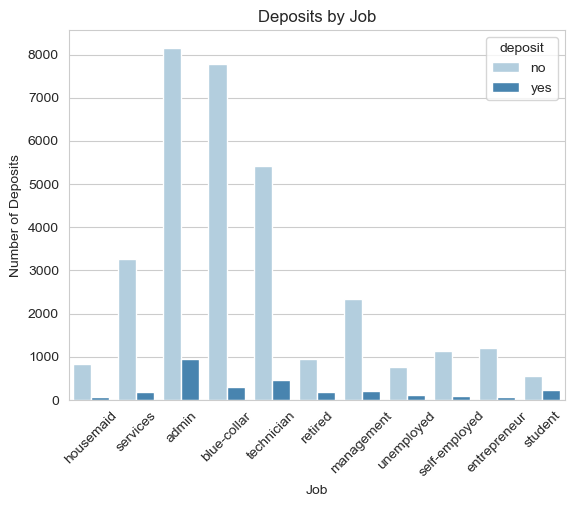

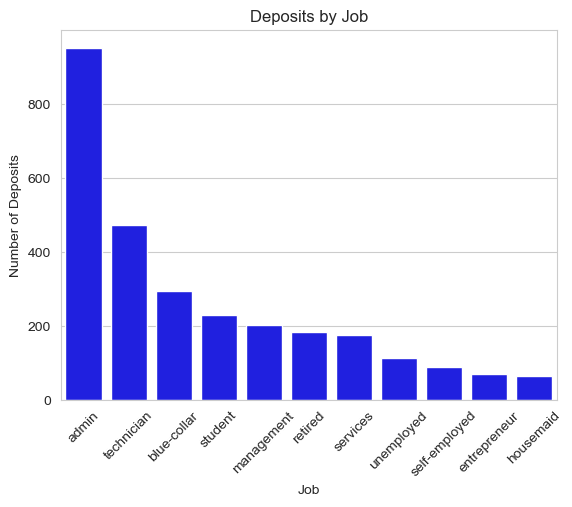

In [63]:
sns.set_style('whitegrid')
sns.countplot(x='job', hue='deposit', data=train_df, palette='Blues')


plt.xlabel('Job')
plt.ylabel('Number of Deposits')
plt.title('Deposits by Job')
plt.xticks(rotation=45)
plt.show()


ct = pd.crosstab(train_df['job'], train_df['deposit'])
ct_sorted = ct.sort_values(by='yes', ascending=False)

sns.set_style('whitegrid')
sns.barplot(x=ct_sorted.index, y='yes', data=ct_sorted, color='blue')

plt.xlabel('Job')
plt.ylabel('Number of Deposits')
plt.title('Deposits by Job')
plt.xticks(rotation=45)
plt.show()

* Melihat distribusi data dari Job yang terlihat tidak terdistribusi merata
* Customer dari bidang pekerjaan sebagai admin memiliki jumlah <b>deposit</b> tertinggi diikuti oleh technician, blue-collar, student, dst. Maka dari itu kita dapat lebih memfokuskan campaign kepada bidang pekerjaan yang memiliki rasio deposit tertinggi agar dapat lebih efektif. 

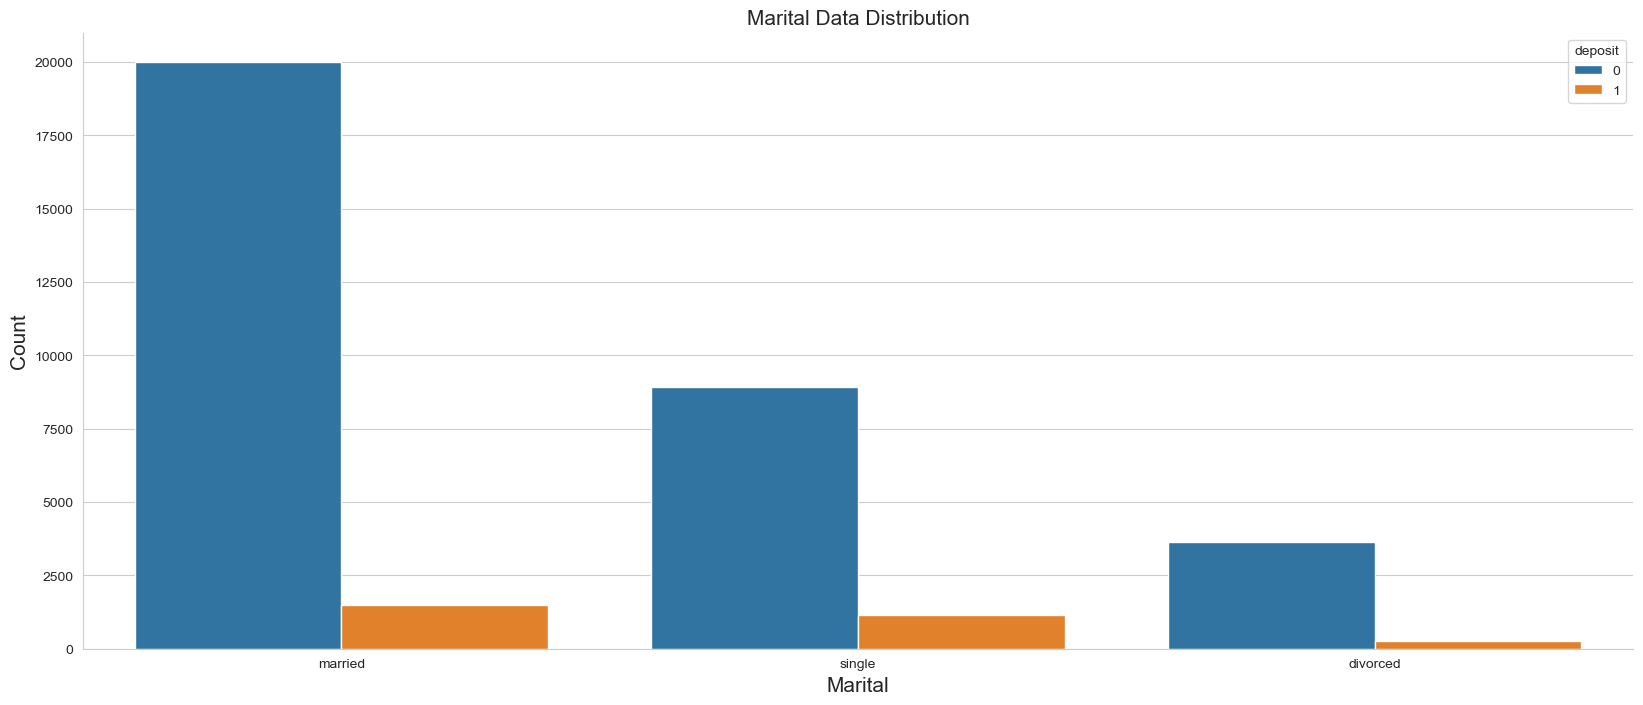

In [116]:
# marital Data Distribution
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'marital',hue = 'deposit', data =  train_df)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Data Distribution', fontsize=15)
sns.despine()

* Melihat distribusi data dari Marital yang terlihat tidak terdistribusi merata
* Customer dari status marital memiliki jumlah <b>deposit</b> tertinggi yaitu jatuh kepada mereka yang sudah berkeluarga, Maka dari itu kita dapat lebih memfokuskan campaign kepada bidang pekerjaan yang memiliki rasio deposit tertinggi agar dapat lebih efektif. 

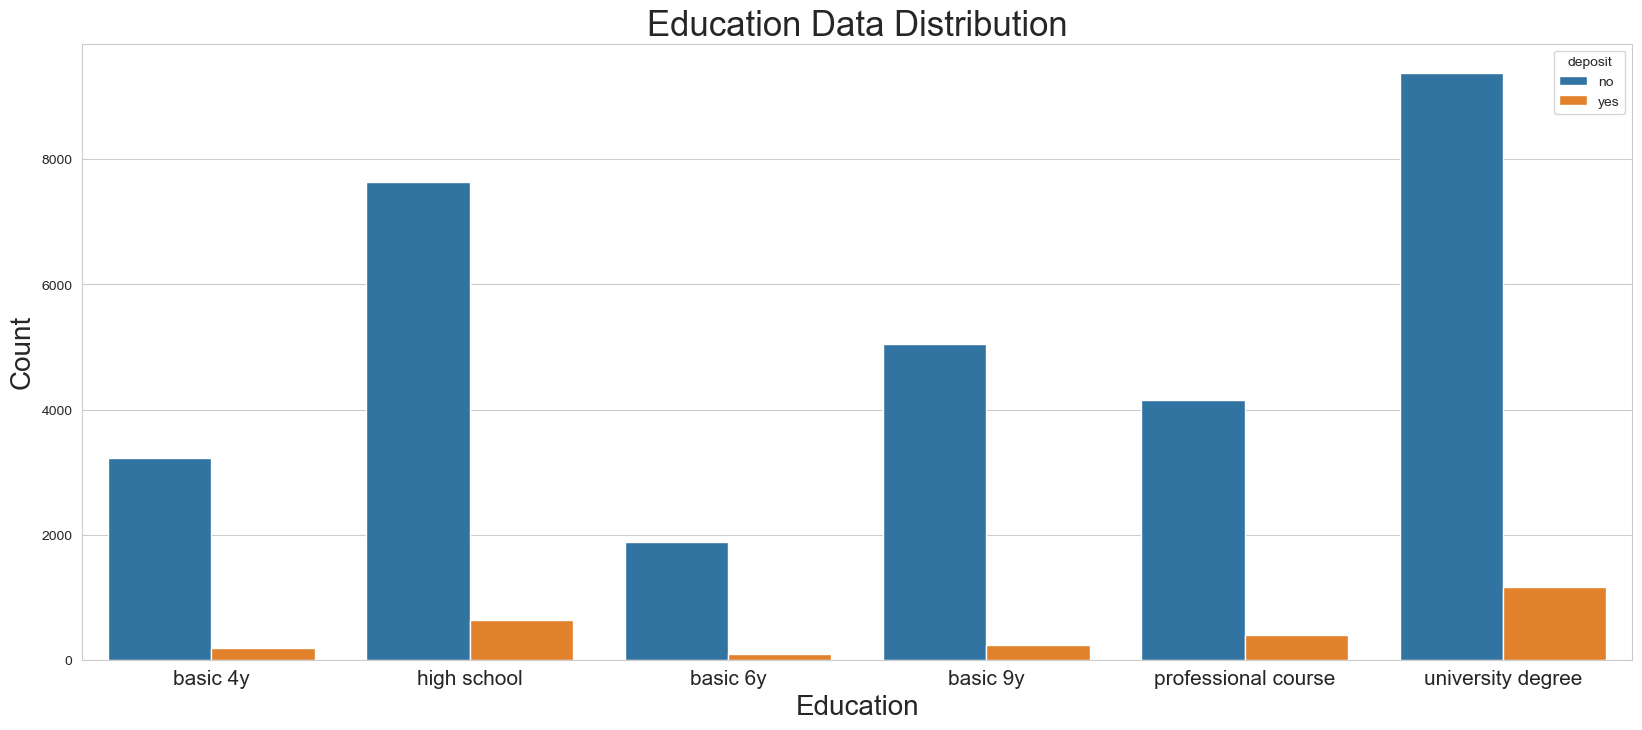

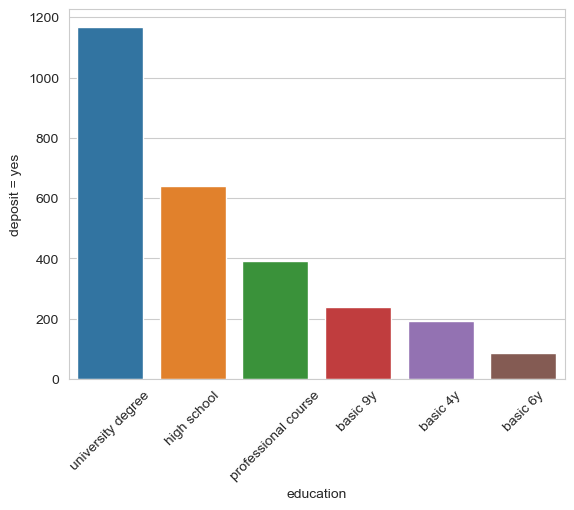

In [65]:
# Education Data Dist
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x='education', hue='deposit',data=train_df)
ax.set_xlabel('Education', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_title('Education Data Distribution', fontsize=25)

plt.xticks(fontsize=15)
plt.show()


ct_edu = pd.crosstab(train_df['education'], train_df['deposit'])
ct_edu_sorted = ct_edu.sort_values(by='yes', ascending=False)

sns.barplot(x =ct_edu_sorted.index , y='yes', data = ct_edu_sorted)

plt.ylabel('deposit = yes')
# ax.set_xlabel('Education', fontsize=20)
# ax.set_ylabel('Count', fontsize=20)
# ax.set_title('Education Data Distribution', fontsize=25)

plt.xticks(fontsize=10, rotation=45)
plt.show()

* Melihat distribusi data dari Education yang terlihat tidak terdistribusi merata
* Customer dari status pendidikan dengan university degree memiliki jumlah <b>deposit</b> tertinggi, Maka dari itu kita dapat lebih memfokuskan campaign kepada customer yang memiliki rasio deposit tertinggi agar dapat lebih efektif. 

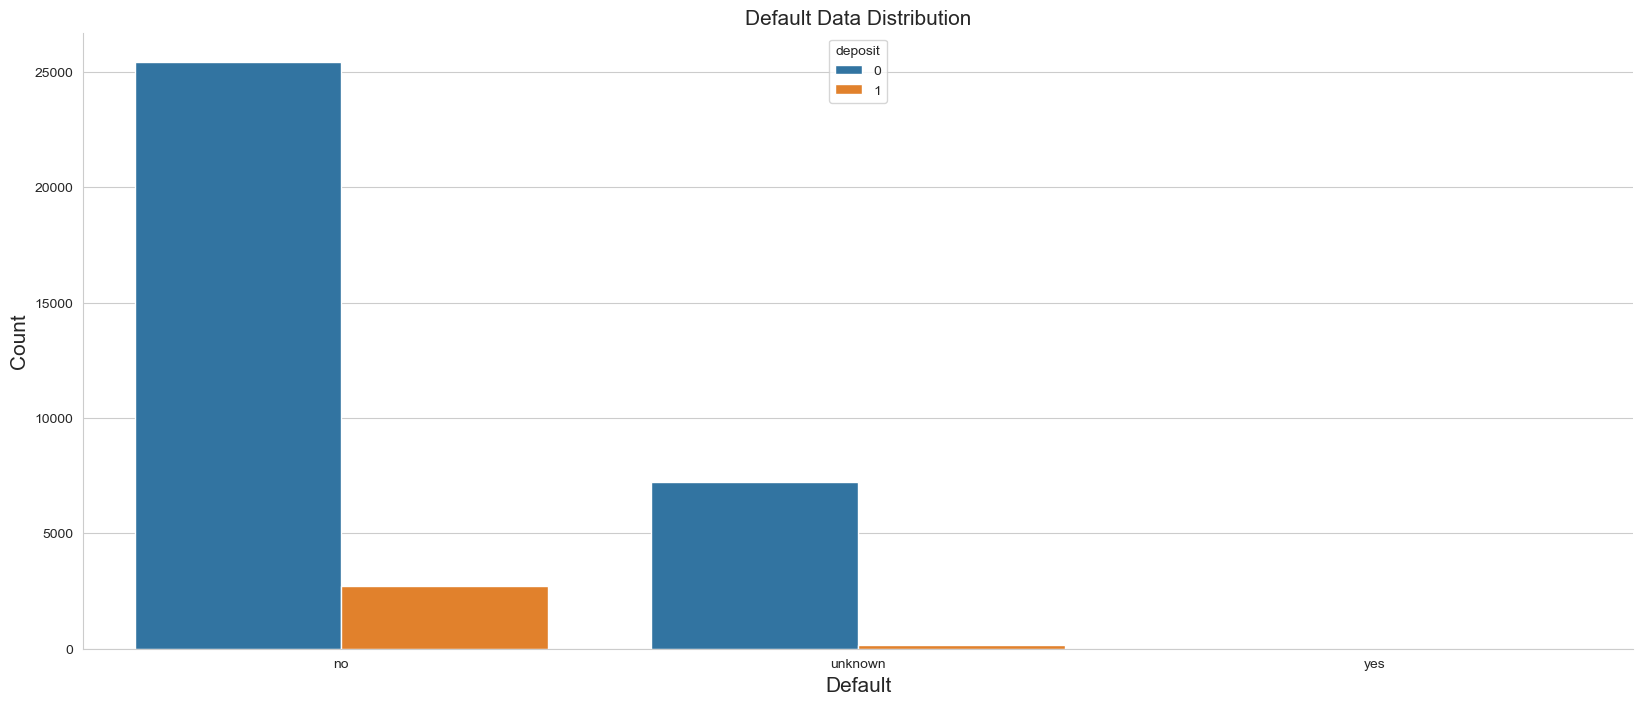

In [115]:
# Default Data Distribution 
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'default',hue = 'deposit', data =  train_df)
ax.set_xlabel('Default', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Default Data Distribution', fontsize=15)
sns.despine()

Default merupakan data dari customer yang gagal untuk membayar bunga atau pokok pinjaman pada jangka waktu yang telah disepakati dalam kontrak pinjaman. Default dapat terjadi pada berbagai jenis utang, seperti utang kartu kredit, hipotek, obligasi korporasi, atau utang pemerintah.
* Distribusi data dari Default yang terlihat tidak terdistribusi merata 
* Sejauh ini customer existing dari campaign yang telah dibuat telah baik karena sudah menargetkan kepada customer yang memiliki track record hutang yang baik. 

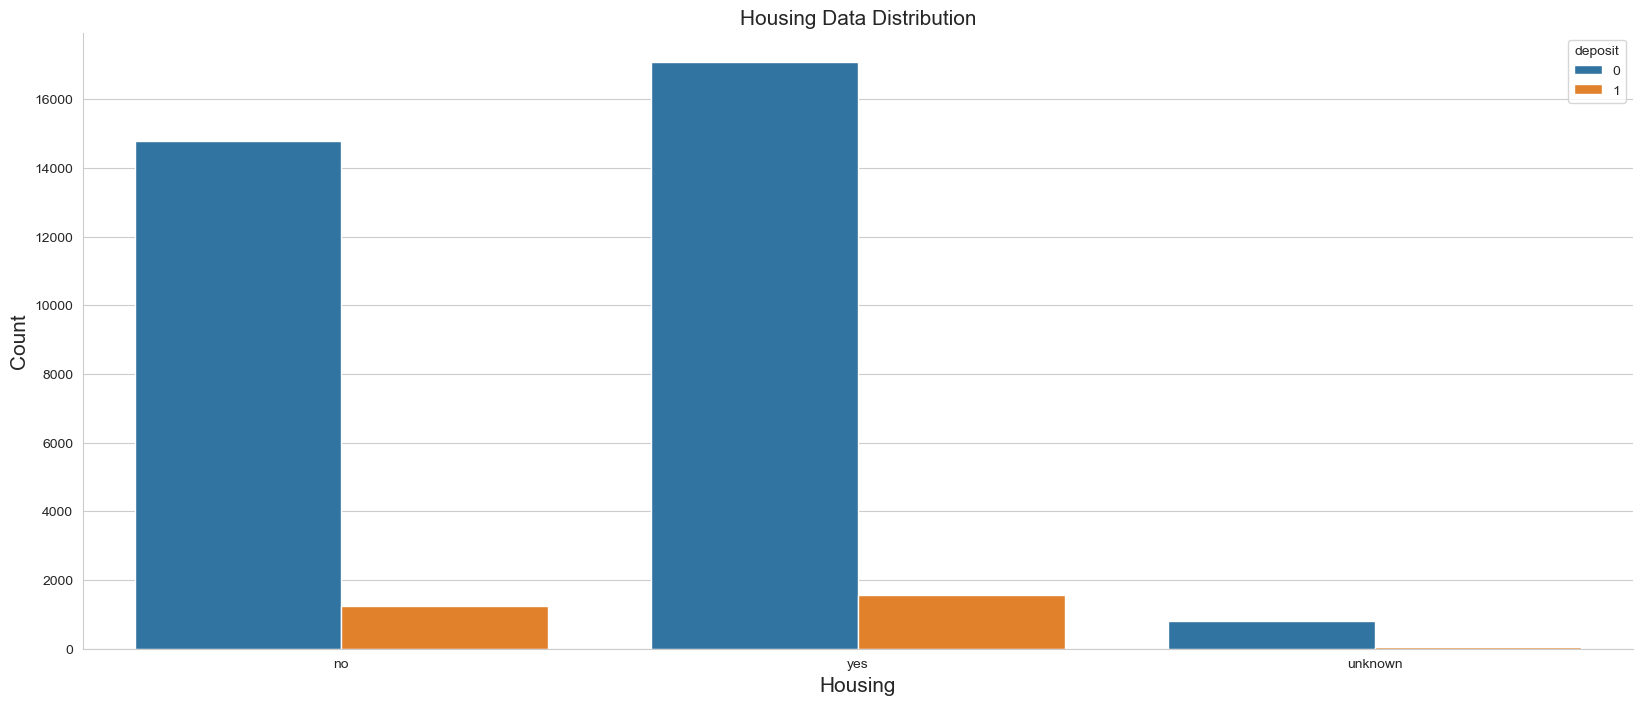

In [114]:
# Housing Data Distribution
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'housing', hue = 'deposit', data =  train_df)
ax.set_xlabel('Housing', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Housing Data Distribution', fontsize=15)
sns.despine()

Housing merujuk pada segala hal yang berkaitan dengan perumahan atau tempat tinggal, termasuk pembelian, penjualan, pembiayaan, dan investasi properti.
* Dalam distribusi data housing terdapat tidak meratanya distribusi data yang merupakan hal yang wajar terjadi pada data housing ini. 
* Overall customer disini cukup berimbang pada data housing ini.

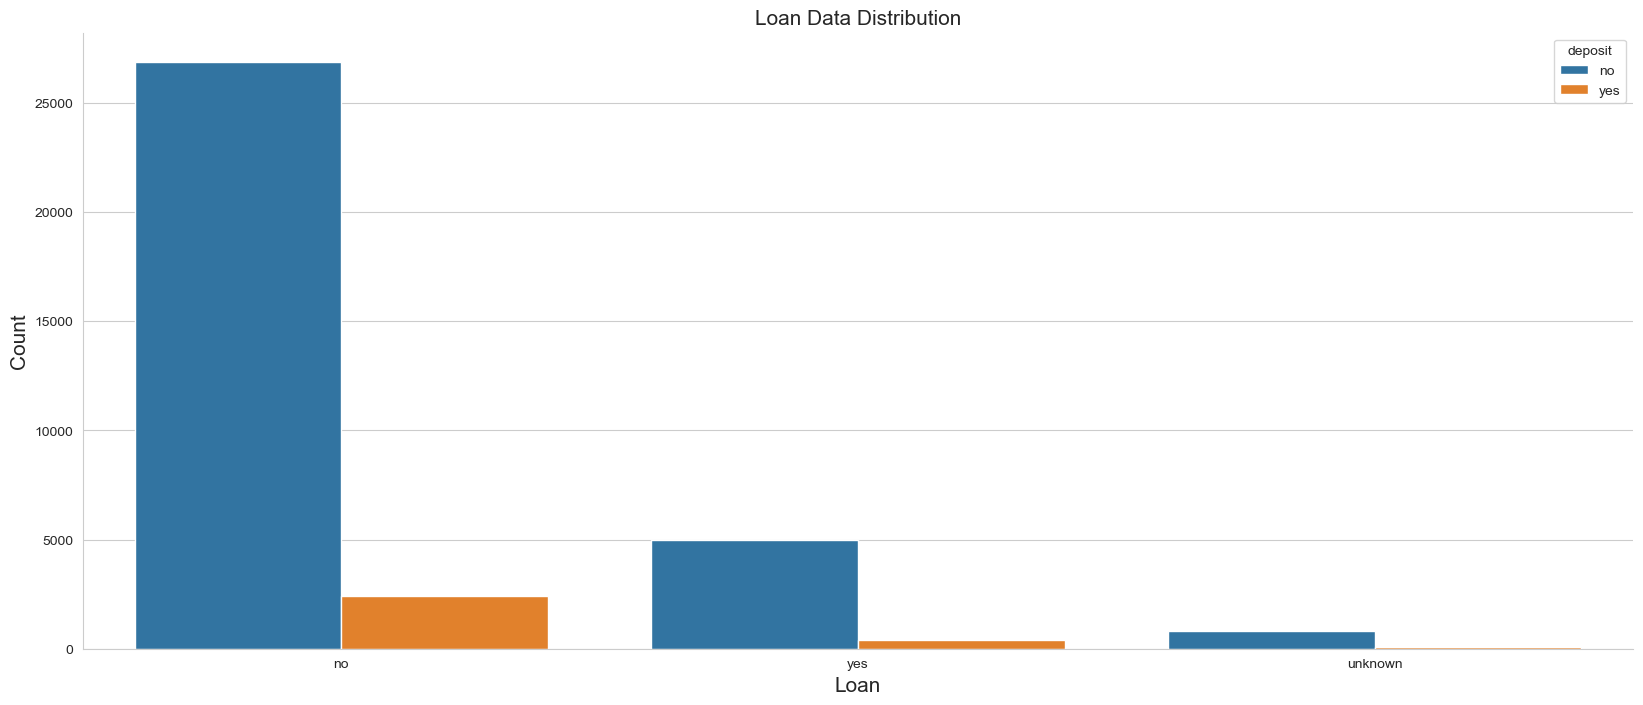

In [68]:
# Loan Data Distribution
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'loan', hue = 'deposit', data =  train_df)
ax.set_xlabel('Loan', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Loan Data Distribution', fontsize=15)
sns.despine()

Loan merupakan data customer dengan memiliki pinjaman yang dapat diberikan oleh berbagai lembaga keuangan, seperti bank, koperasi, atau institusi keuangan non-bank lainnya.
* Sebagian besar customer yang melakukan deposit adalah mereka yang tidak memiliki pinjaman, Namun tidak menutup kemungkinan jika customer yang memiliki pinjaman juga melakukan deposit.

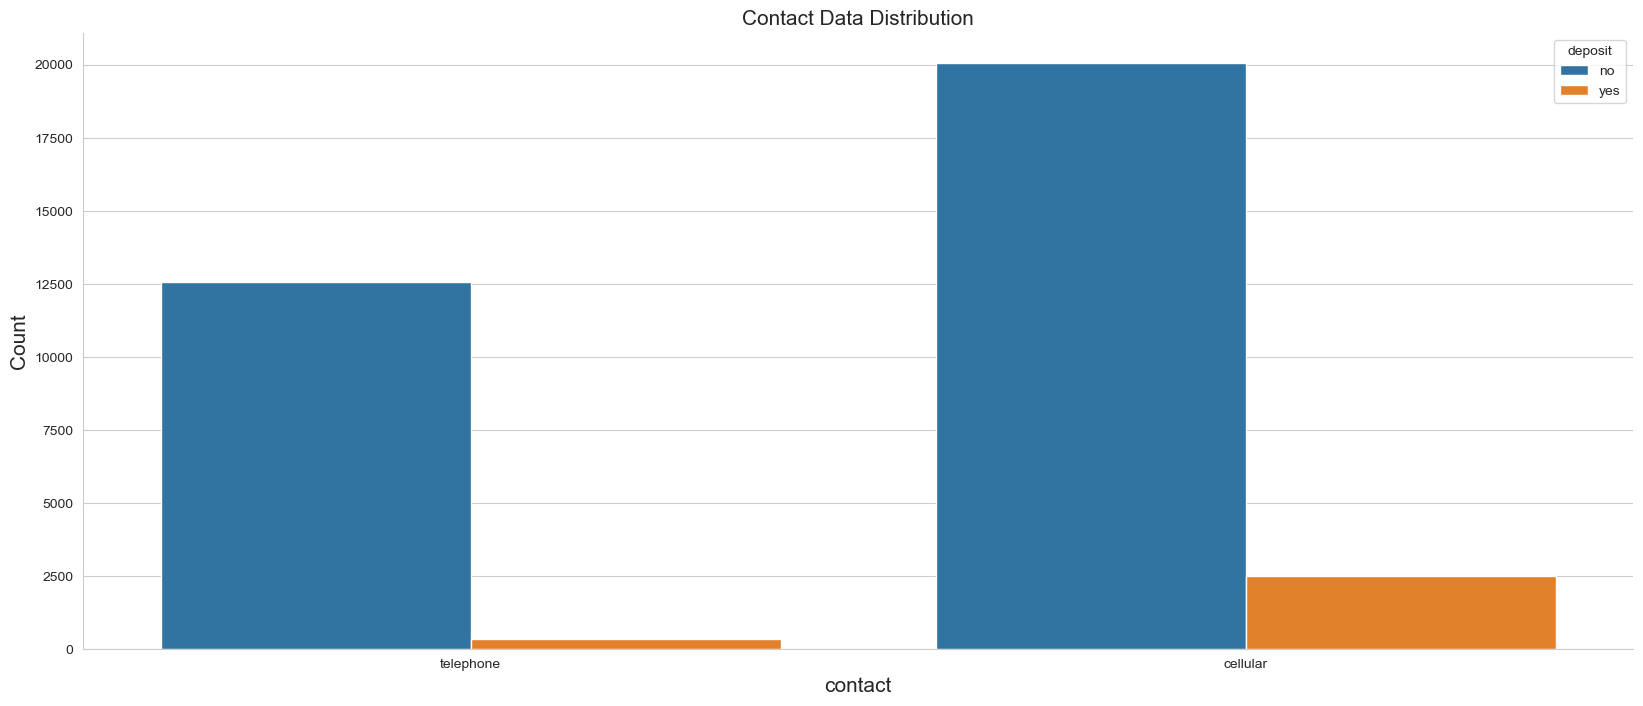

In [69]:
# Contact Data Distribution
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'contact', hue='deposit', data =  train_df)
ax.set_xlabel('contact', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Contact Data Distribution', fontsize=15)
sns.despine()

Celullar merupakan data yang menampilkan bagaimana campaign dilakukan baik itu menggunakan cellular atau telephone, Overall dari data ini dapat disimpulkan bahwa campaign ke cellular customer memiliki tingkat efektivitas deposit terbaik.

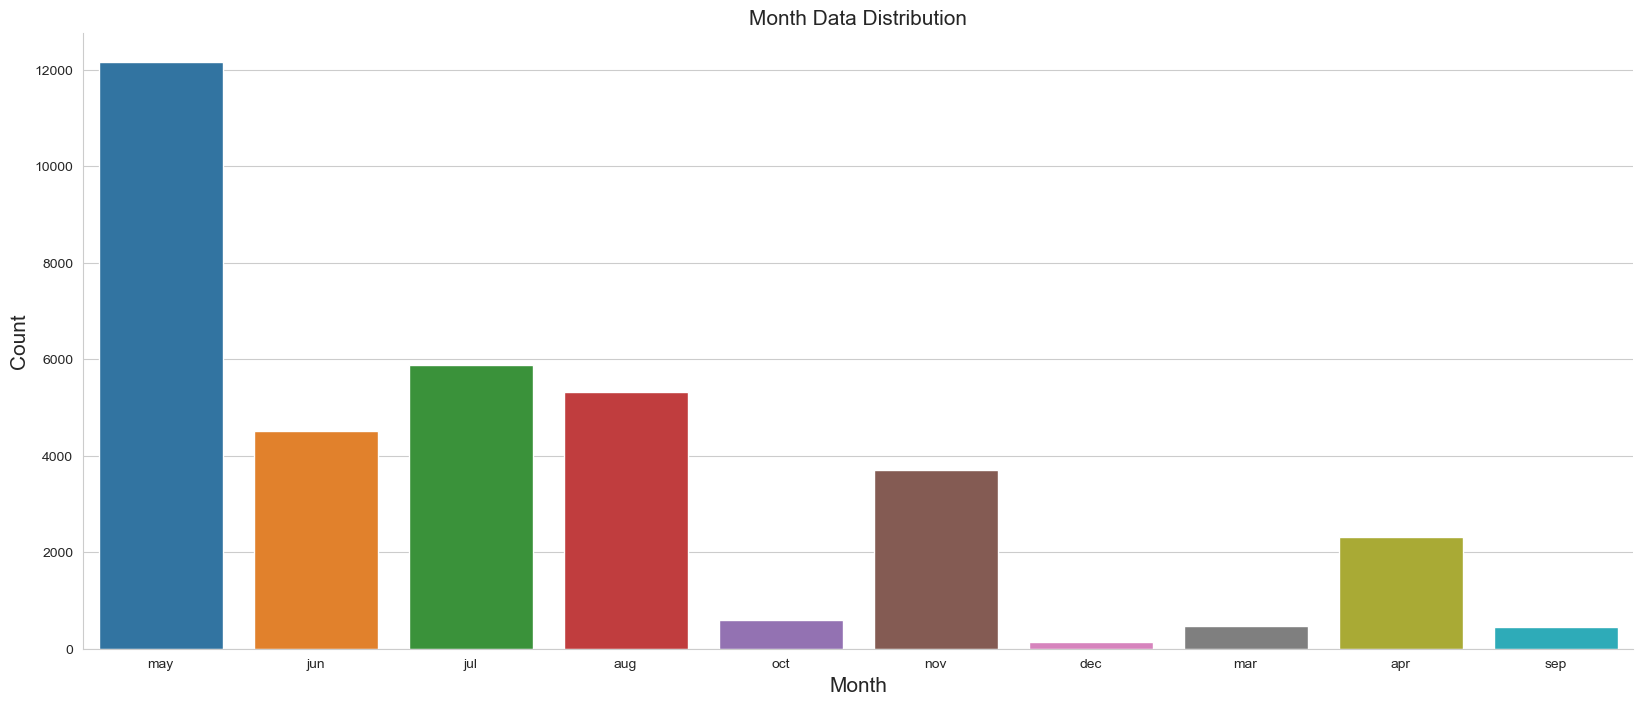

In [70]:
# Month Data Distribution
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'month', data =  train_df)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Month Data Distribution', fontsize=15)
sns.despine()

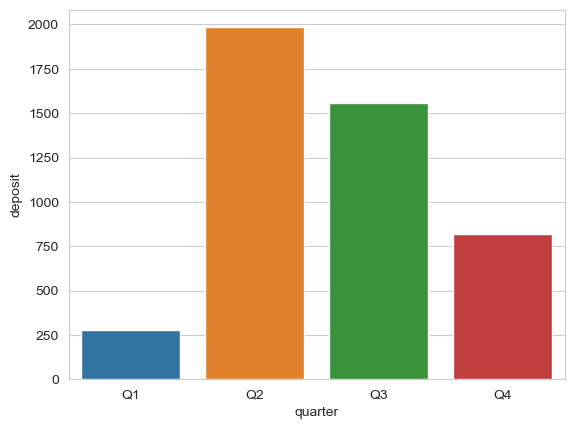

In [71]:
# create a dictionary to map the month to the quarter
quarter_map = {'jan': 'Q1', 'feb': 'Q1', 'mar': 'Q1',
               'apr': 'Q2', 'may': 'Q2', 'jun': 'Q2',
               'jul': 'Q3', 'aug': 'Q3', 'sep': 'Q3',
               'oct': 'Q4', 'nov': 'Q4', 'dec': 'Q4'}

dp_yes = depo_yes.groupby('month', as_index=False)['deposit'].count()
months = ['mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

# Convert the month column to a Categorical data type with the custom order
dp_yes['month'] = pd.Categorical(dp_yes['month'], categories=months, ordered=True)

# create a new column with the quarter
dp_yes['quarter'] = dp_yes['month'].map(quarter_map)

# group by the quarter and sum the deposits
result = dp_yes.groupby('quarter', as_index=False)['deposit'].sum()

# print(result)
sns.barplot(x=result['quarter'], y=result['deposit']);

* Terdapat distribusi pada data month yang tidak merata 
* Terdapat lonjakan deposit pada Q2 yaitu pada bulan april, may, june setelah sebelumnya pada Q1 cenderung rendah, Sehingga kita dapat menganalisis lebih lanjut campaign seperti apa yang terjadi pada Q2 mengapa bisa terjadi demikian serta mengoreksi apa yang terjadi pada Q3 dan Q4 karena selalu mengalami penurunan

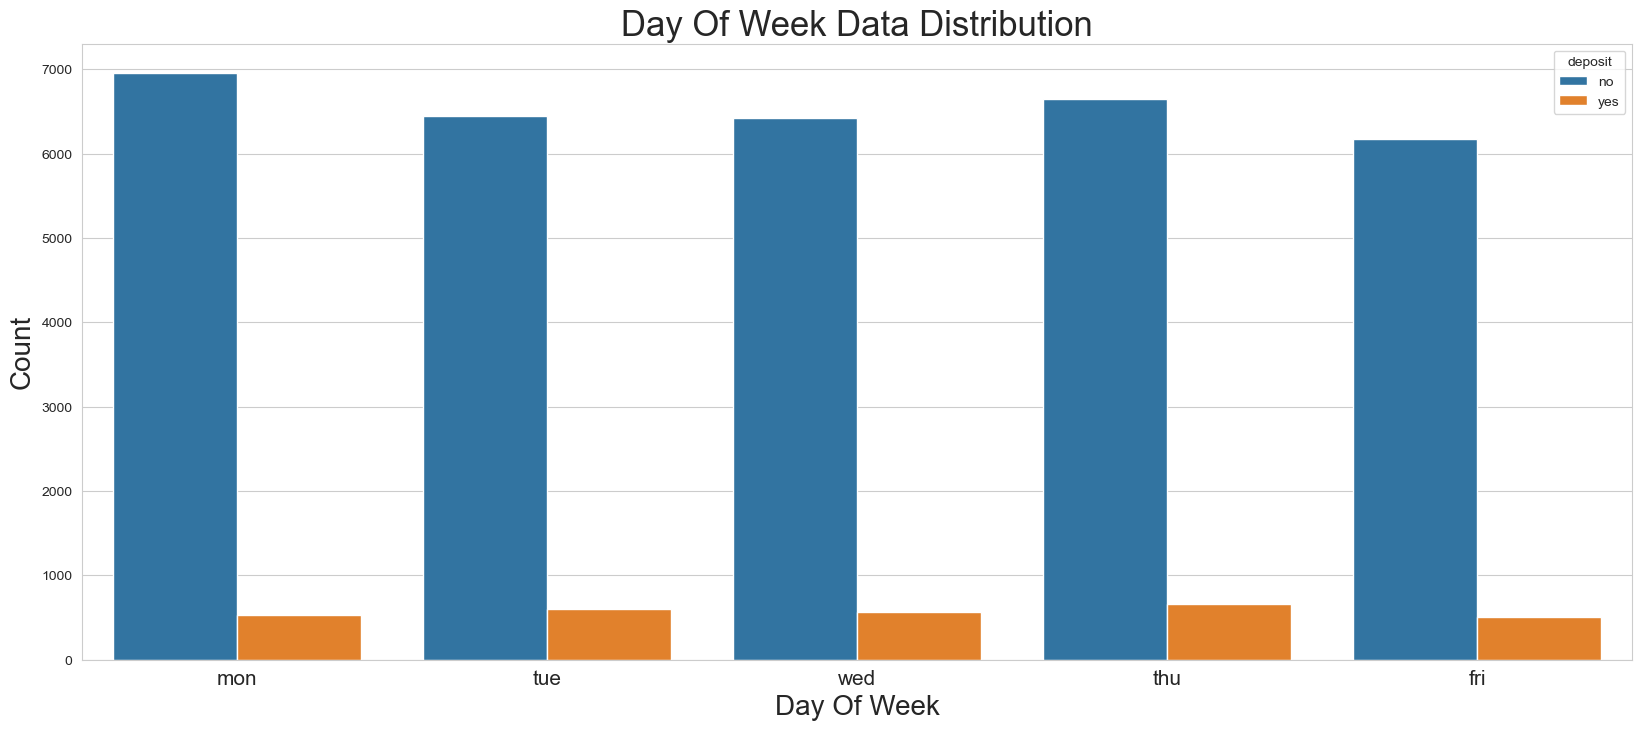

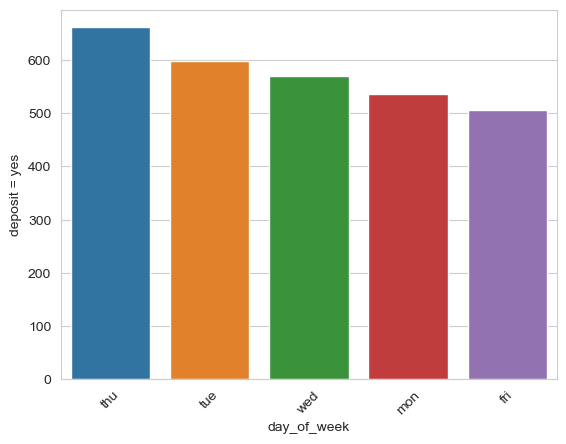

In [72]:
# Day Of Week Data Distribution
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'day_of_week', hue='deposit' ,data =  train_df)
ax.set_xlabel('Day Of Week', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_title('Day Of Week Data Distribution', fontsize=25)

plt.xticks(fontsize=15)
plt.show()

ct_days = pd.crosstab(train_df['day_of_week'], train_df['deposit'])
ct_days_sorted = ct_days.sort_values(by='yes', ascending=False)

sns.barplot(x =ct_days_sorted.index , y='yes', data = ct_days_sorted)

plt.ylabel('deposit = yes')

plt.xticks(fontsize=10, rotation=45)
plt.show()

Dapat ditarik kesimpulan campaign pada hari kamis memiliki angka deposit yang tinggi, maka dari itu kita dapat menganalisis bagaimana perilaku customer pada hari itu mengapa bisa memiliki nilai deposit yang tinggi.

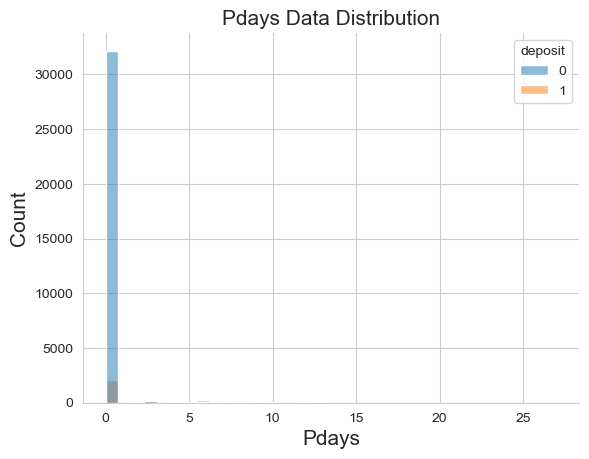

In [117]:
# Pdays Data Distribution
fig.set_size_inches(20, 8)
ax=sns.histplot(x = 'pdays', hue = 'deposit' ,data =  train_df, bins=35)
ax.set_xlabel('Pdays', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Pdays Data Distribution', fontsize=15)
sns.despine()

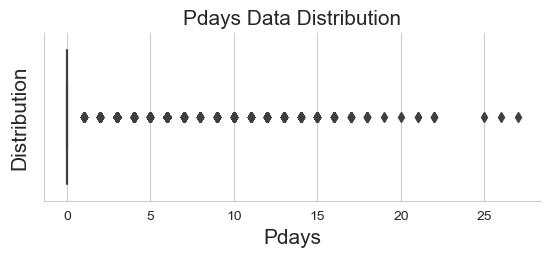

In [74]:
# Add the second subplot (bottom plot)
ax2 = plt.subplot(2, 1, 2)
sns.boxplot(x='pdays', data=train_df, ax=ax2)
ax2.set_xlabel('Pdays', fontsize=15)
ax2.set_ylabel('Distribution', fontsize=15)
ax2.set_title('Pdays Data Distribution', fontsize=15)
sns.despine()

Kolom `pdays` berisi tentang berapa hari yang sudah berlalu dari kontak terakhir dengan nasabah pada campaign sebelumnya. Disini dapat kita lihat bahwa secara distribusi, kebanyakan belum pernah ditawarkan pada campaign sebelumnya, sehingga jumlah hari mayoritas mempunya value 0, dan selisih hari dari kontak terakhir dengan nasabah-nasabah yang pernah ditawarkan pada campaign sebelumnya terhitung sebagai outlier.

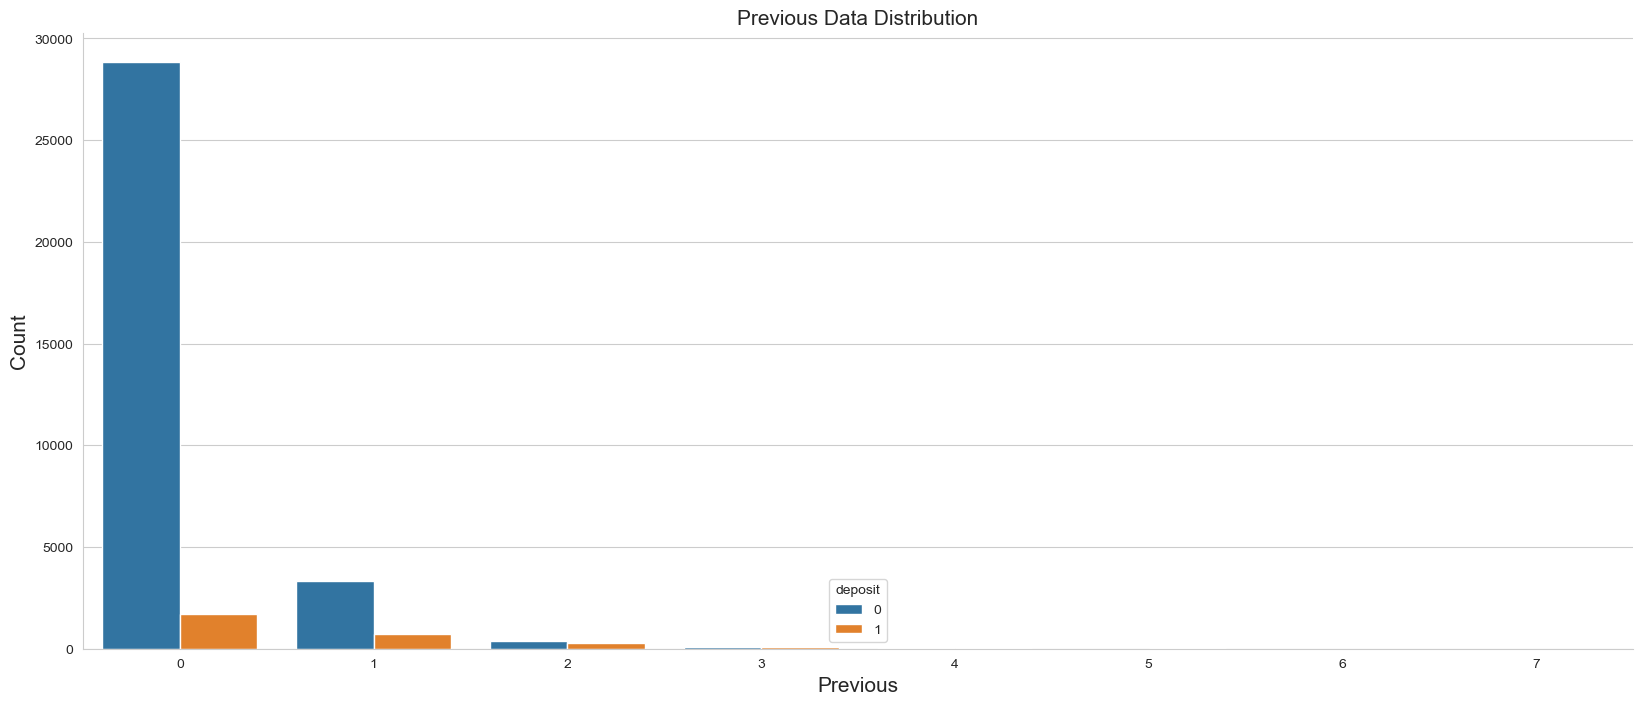

In [118]:
# Previous Data Distribution 
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'previous',hue = 'deposit', data =  train_df)
ax.set_xlabel('Previous', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Previous Data Distribution', fontsize=15)
sns.despine()

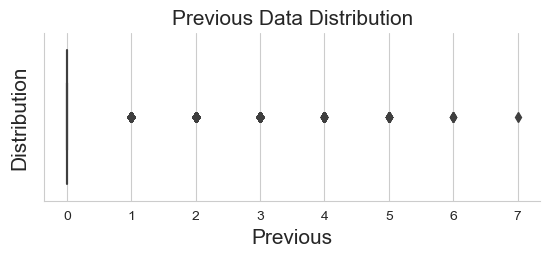

In [76]:
# Add the second subplot (bottom plot)
ax2 = plt.subplot(2, 1, 2)
sns.boxplot(x='previous', data=train_df, ax=ax2)
ax2.set_xlabel('Previous', fontsize=15)
ax2.set_ylabel('Distribution', fontsize=15)
ax2.set_title('Previous Data Distribution', fontsize=15)
sns.despine()

Kolom `previous` berisi jumlah kontak sebelumnya yang dilakukan kepada nasabah selama campaign sebelumnya. Dapat terlihat bahwa data mayoritas memiliki value 0, dimana belum pernah dilakukan kontak, atau baru pertama kali ditawarkan.

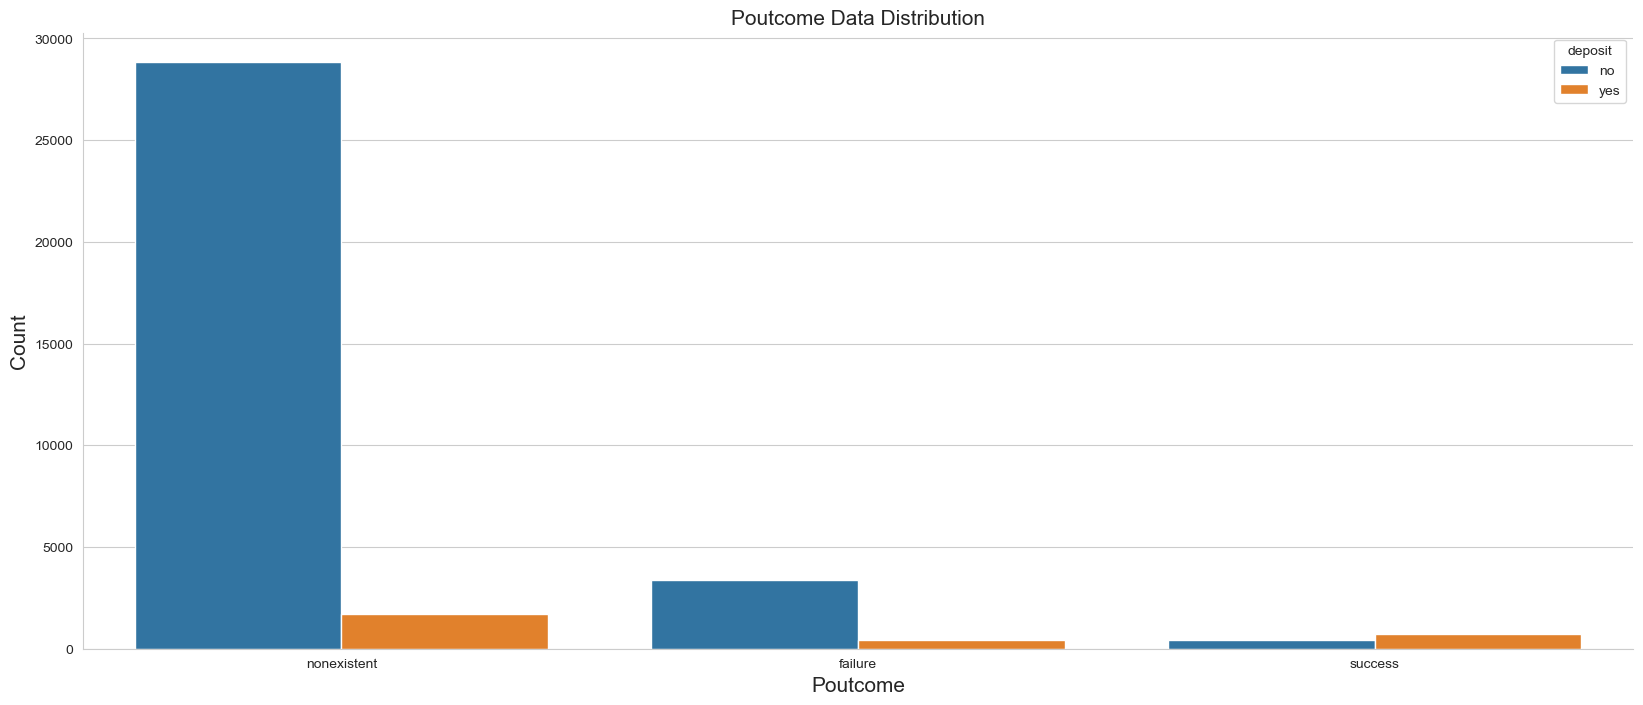

In [77]:
# Poutcome Data Distribution
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'poutcome', hue = 'deposit', data =  train_df)
ax.set_xlabel('Poutcome', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Poutcome Data Distribution', fontsize=15)
sns.despine()

poutcome merupakan hasil dari campaign sebelumnya, dapat terlihat bahwa customer nonexistent yaitu nasabah yang belum mengkuti campaign sebelumnya hanya sedikit yang melakukan deposit. 

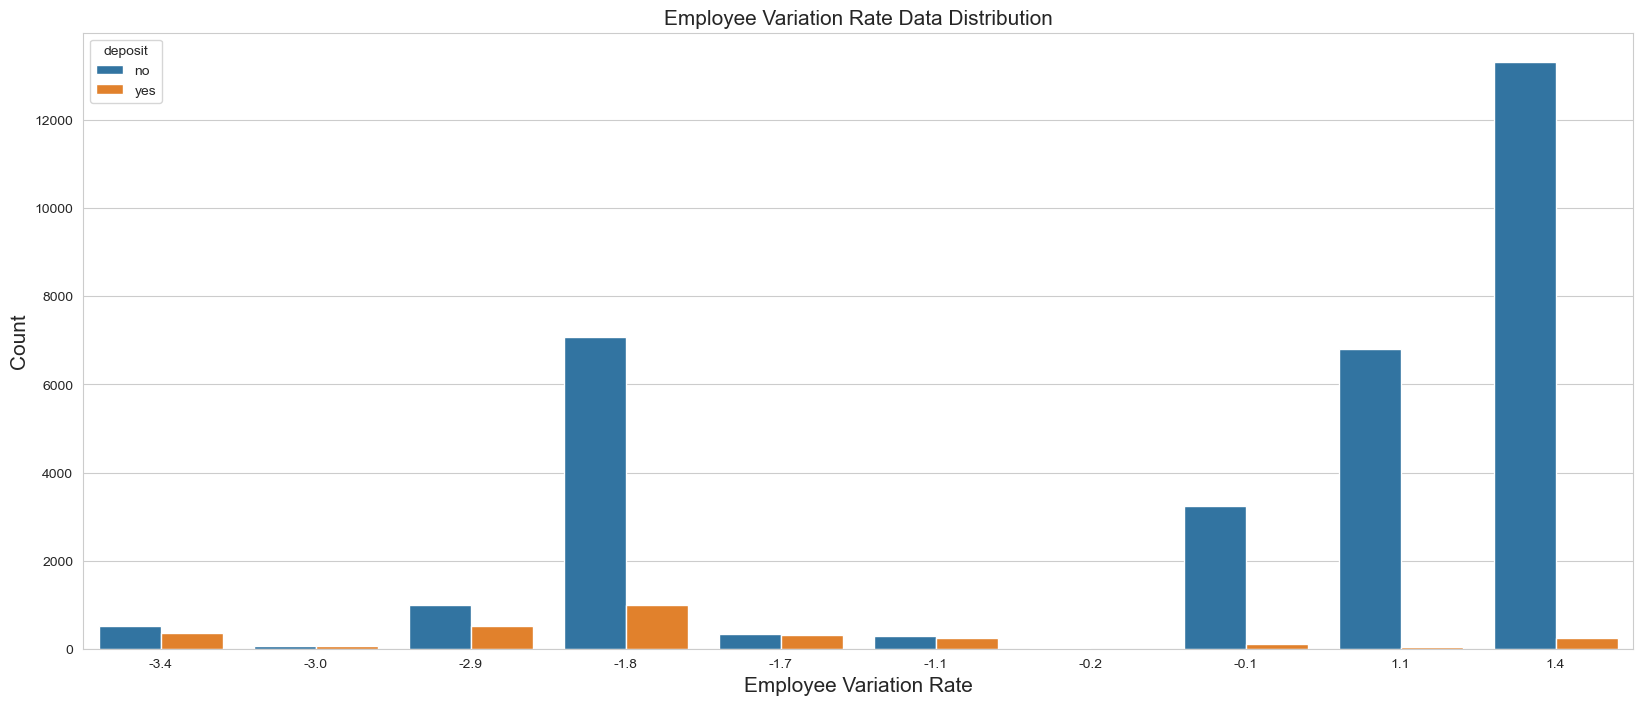

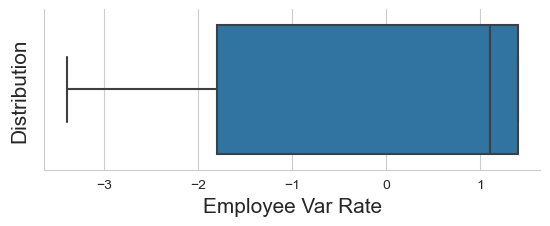

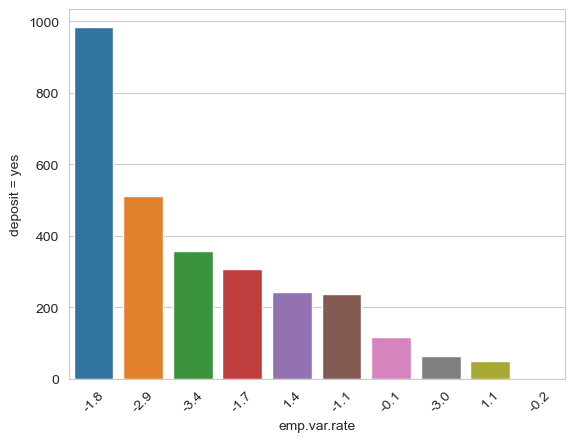

In [78]:
# Employee Variation Rate Data Distribution
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'emp.var.rate', hue='deposit',data =  train_df)

ax.set_xlabel('Employee Variation Rate', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Employee Variation Rate Data Distribution', fontsize=15)
plt.show()

# Add the second subplot (bottom plot)
ax2 = plt.subplot(2, 1, 2)
sns.boxplot(x='emp.var.rate', data=train_df, ax=ax2)
ax2.set_xlabel('Employee Var Rate', fontsize=15)
ax2.set_ylabel('Distribution', fontsize=15)
sns.despine()

plt.subplots_adjust(hspace=0.3) # To add some space between the subplots

plt.show()

ct_emp = pd.crosstab(train_df['emp.var.rate'], train_df['deposit'])
ct_emp_sorted = ct_emp.sort_values(by= 'yes', ascending=False)

ax = sns.barplot(x=ct_emp.index , y=ct_emp_sorted['yes'])

ax.set_xticklabels(ct_emp_sorted.index)

plt.ylabel('deposit = yes')

plt.xticks(fontsize=10, rotation=45)
plt.show()

* Employee Variation Rate (EVR) adalah istilah yang digunakan dalam statistik ketenagakerjaan untuk mengukur tingkat variasi atau fluktuasi dalam jumlah pekerjaan dalam suatu periode waktu tertentu 
* Dapat terlihat saat EVR tidak mengalami minus maka angka deposit melonjak tinggi maka dapat disimpulkan bahwa timing untuk melakukan campaign yaitu menyesuaikan pada keadaan ekonomi pada suatu wilayah ataupun sektor tertentu. 

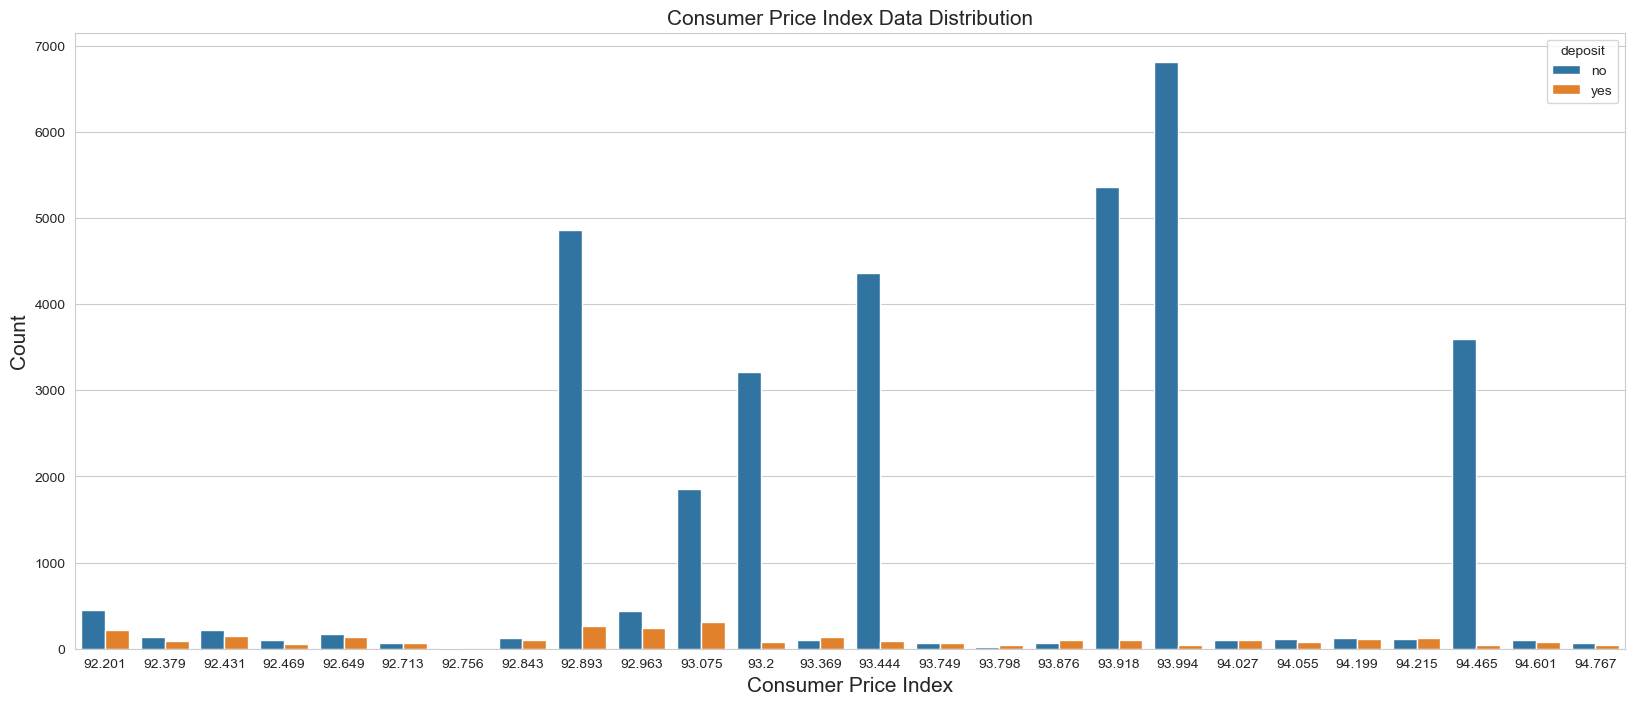

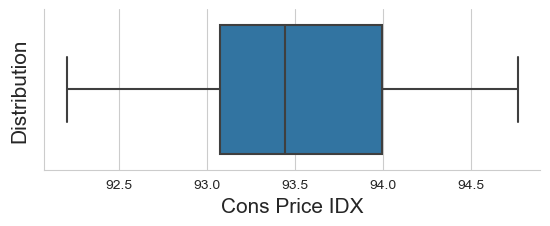

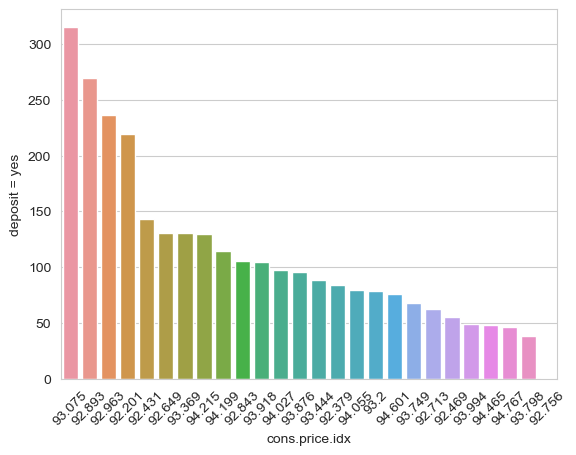

In [79]:
# Consumer Price Index Data Distribution
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'cons.price.idx', hue='deposit',data = train_df)
ax.set_xlabel('Consumer Price Index', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Consumer Price Index Data Distribution', fontsize=15)
plt.show()

# Add the second subplot (bottom plot)
ax2 = plt.subplot(2, 1, 2)
sns.boxplot(x='cons.price.idx', data=train_df, ax=ax2)
ax2.set_xlabel('Cons Price IDX', fontsize=15)
ax2.set_ylabel('Distribution', fontsize=15)
sns.despine()

plt.subplots_adjust(hspace=0.3) # To add some space between the subplots
plt.show()

ct_cpi = pd.crosstab(train_df['cons.price.idx'], train_df['deposit'])
ct_cpi_sorted = ct_cpi.sort_values(by= 'yes', ascending=False)

ax = sns.barplot(x =ct_cpi.index , y='yes', data = ct_cpi_sorted)

ax.set_xticklabels(ct_cpi_sorted.index)

plt.ylabel('deposit = yes')

plt.xticks(fontsize=10, rotation=45)
plt.show()

* Cons Price Index Merupakan indikator ekonomi yang mengukur perubahan harga rata-rata dari sekelompok barang dan jasa yang biasa dikonsumsi oleh rumah tangga. CPI digunakan untuk mengukur inflasi, yaitu laju kenaikan harga barang dan jasa secara umum dalam perekonomian.
* Dapat disimpulkan bahwa aktivitas customer deposit berdasarkan CPI tidak dapat diprediksi namun, dalam hal ini dapat dilakukan analisa lebih lanjut campaign yang dilakukan pada setiap CPI mengapa dapat memiliki lonjakan yang tinggi pada Point CPI menyentuh angka 93,994 kemudian pada angka CPI menyentuh angka tertinggi 94,767 justru memiliki angka deposit yang rendah sedangkan kalau dilihat berdasarkan nilai index seharusnya angka deposit di index CPI tertinggi memiliki angka tertinggi namun tidak demikian. 

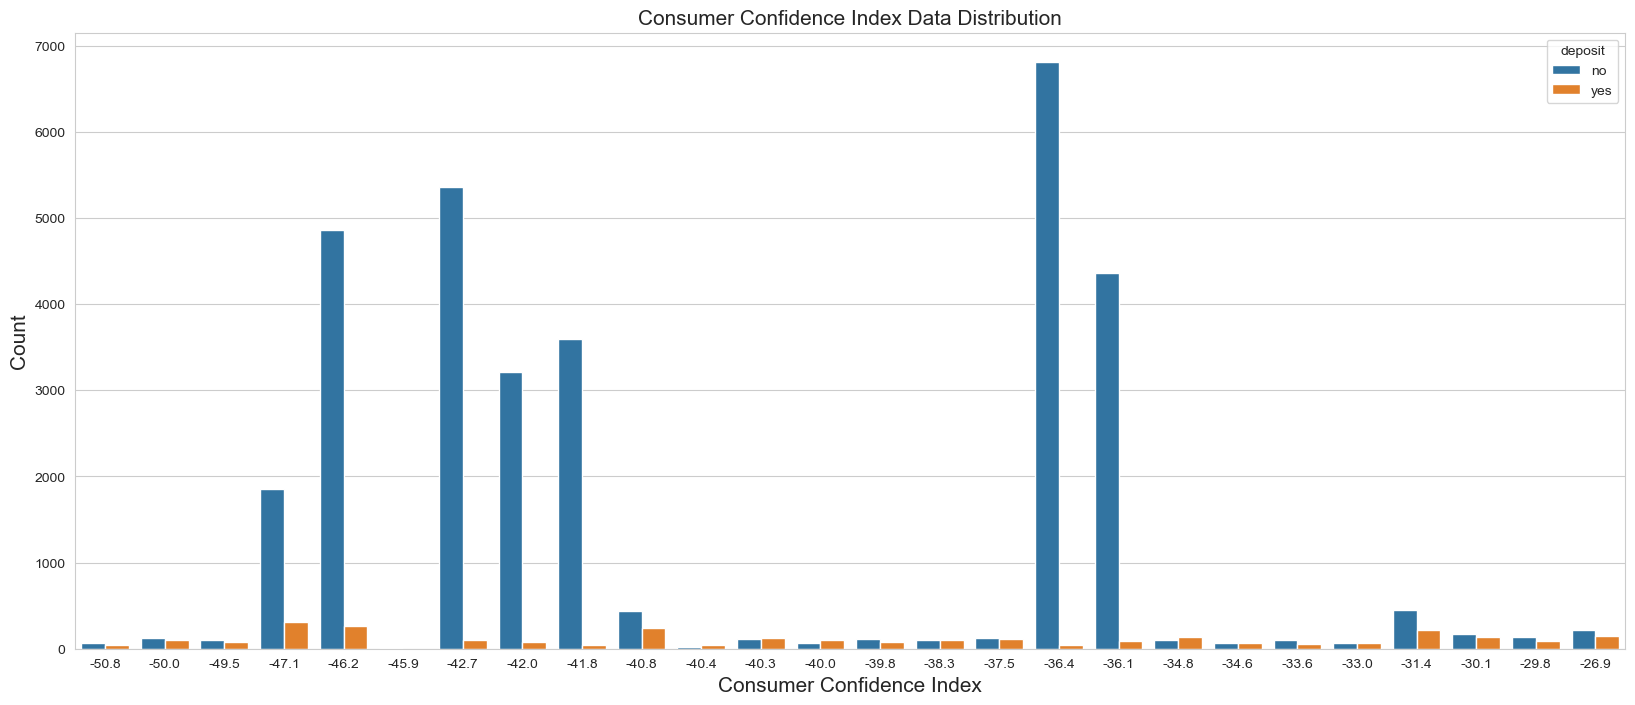

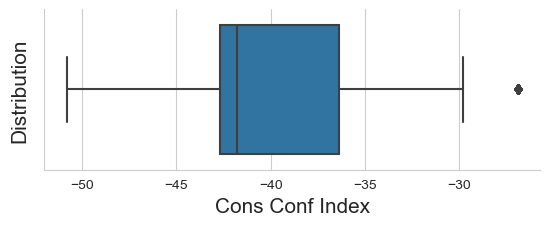

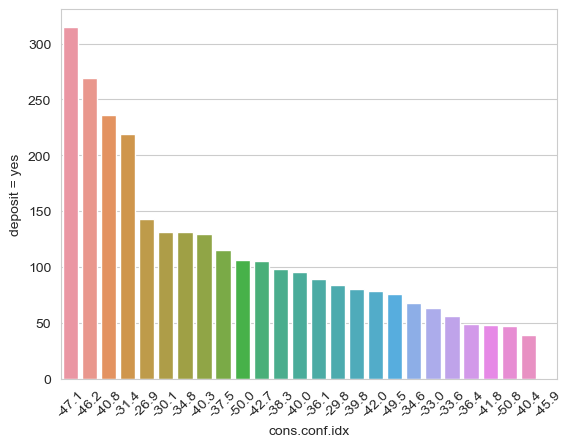

In [80]:
# Consumer Confidence Index Data Distribution
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'cons.conf.idx', hue='deposit',data =  train_df)
ax.set_xlabel('Consumer Confidence Index', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Consumer Confidence Index Data Distribution', fontsize=15)
plt.show()

# Add the second subplot (bottom plot)
ax2 = plt.subplot(2, 1, 2)
sns.boxplot(x='cons.conf.idx', data=train_df, ax=ax2)
ax2.set_xlabel('Cons Conf Index', fontsize=15)
ax2.set_ylabel('Distribution', fontsize=15)
sns.despine()

plt.subplots_adjust(hspace=0.3) # To add some space between the subplots
plt.show()


ct_cci = pd.crosstab(train_df['cons.conf.idx'], train_df['deposit'])
ct_cci_sorted = ct_cci.sort_values(by='yes', ascending=False)

ax = sns.barplot(x =ct_cci.index , y='yes', data = ct_cci_sorted)

ax.set_xticklabels(ct_cci_sorted.index)

plt.ylabel('deposit = yes')

plt.xticks(fontsize=10, rotation=45)
plt.show()

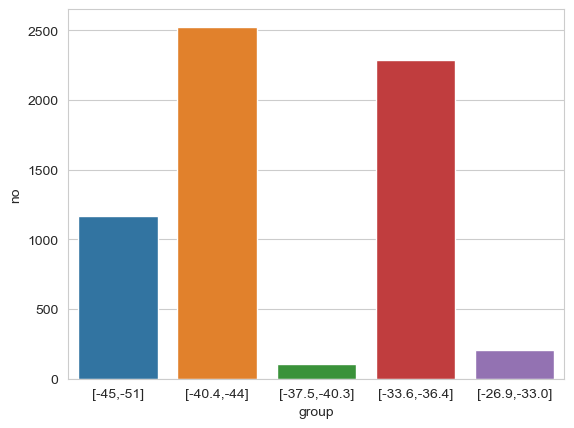

In [81]:
# sort the crosstab by 'deposit = yes'
ct_cci_sorted = ct_cci.sort_values(by=['yes'], ascending=False)

# create 5 groups based on the frequency of 'deposit = yes'
ct_cci_sorted['group'] = pd.qcut(ct_cci_sorted.index, q=5, labels=['[-45,-51]', '[-40.4,-44]', '[-37.5,-40.3]', '[-33.6,-36.4]', '[-26.9,-33.0]'])

ct_cci_sort = ct_cci_sorted.sort_values(by='cons.conf.idx')

sns.barplot(x='group', y=ct_cci_sort['no'], data=ct_cci_sorted, ci=False);

* Consumer Confidence Index (Indeks Keyakinan Konsumen) adalah sebuah indikator ekonomi yang mengukur tingkat optimisme atau keyakinan konsumen terhadap kondisi ekonomi saat ini dan di masa depan. Indeks ini dihasilkan melalui survei yang dilakukan pada sekelompok konsumen terpilih tentang pandangan mereka terhadap kondisi ekonomi, keadaan keuangan pribadi, dan rencana pembelian
* Dapat disimpulkan bahwa aktivitas customer deposit berdasarkan CCI tidak dapat diprediksi namun, dalam hal ini dapat dilakukan analisa lebih lanjut campaign yang dilakukan pada setiap CCI mengapa dapat memiliki lonjakan yang tinggi pada Point CCI menyentuh angka -36,4 kemudian dapat disimpulkan pada saat CCI menyentuh range di agka -45 hingga -51 memiliki jumlah deposit tertinggi. 

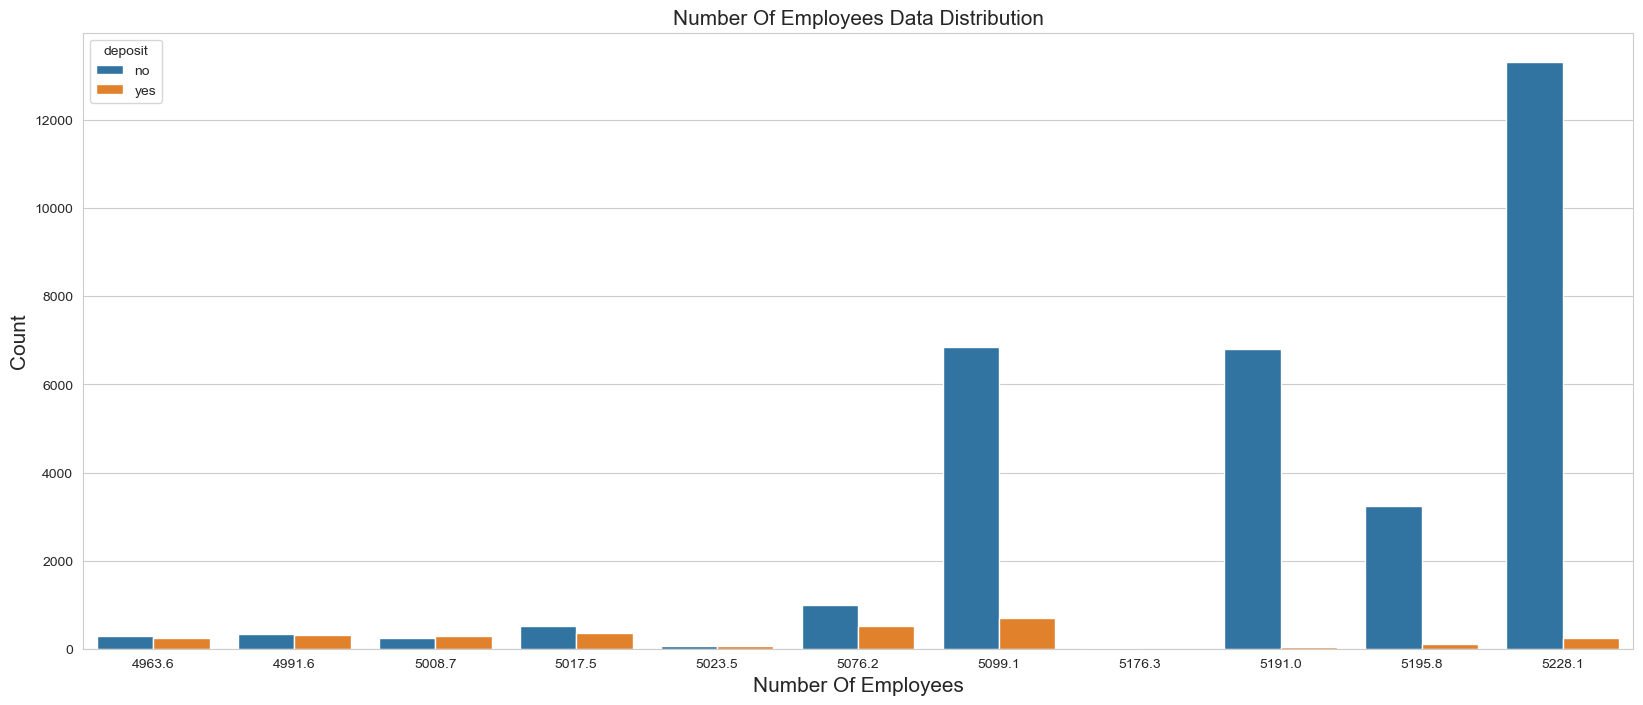

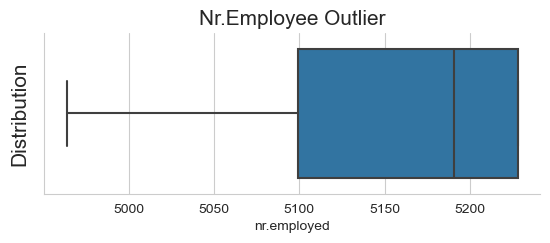

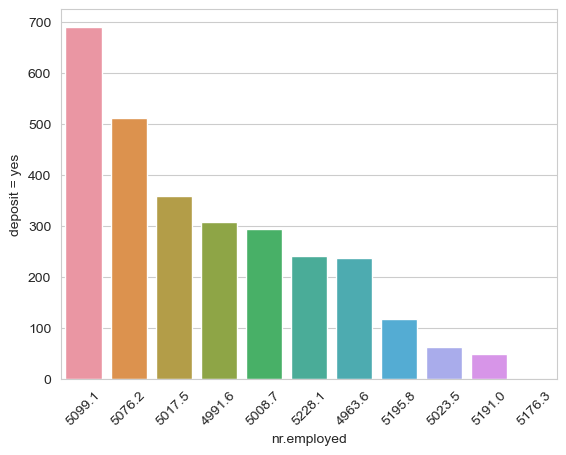

In [82]:
# number of employees Data Distribution
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'nr.employed', hue='deposit',data =  train_df)
ax.set_xlabel('Number Of Employees', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Number Of Employees Data Distribution', fontsize=15)
plt.show()

# Add the second subplot (bottom plot)
ax2 = plt.subplot(2, 1, 2)
sns.boxplot(x='nr.employed', data=train_df, ax=ax2)
ax2.set_ylabel('Distribution', fontsize=15)
ax2.set_title('Nr.Employee Outlier', fontsize=15)
sns.despine()

plt.subplots_adjust(hspace=0.3) # To add some space between the subplots
plt.show()


ct_employee = pd.crosstab(train_df['nr.employed'], train_df['deposit'])
ct_employee_sorted = ct_employee.sort_values(by='yes', ascending=False)

ax = sns.barplot(x =ct_employee.index , y='yes', data = ct_employee_sorted)

ax.set_xticklabels(ct_employee_sorted.index)

plt.ylabel('deposit = yes')

plt.xticks(fontsize=10, rotation=45)
plt.show()

* Nr.Employee atau Number of Employees yang artinya merupakan  jumlah karyawan atau pegawai yang bekerja di suatu perusahaan atau organisasi pada suatu waktu tertentu. Yang biasanya informasi mengenai jumlah karyawan ini digunakan untuk analisis kinerja dan manajemen sumber daya manusia di perusahaan. 
* Pada data ini dapat disimpulkan bahwa company dengan Nr.Employee yang tinggi  memiliki tingkat deposit yang tinggi, ini dikarenakan kestabilan perusahaan tempat customer deposit berkerja memiliki tingkat kestabilan yang baik sehingga pada saat customer melakukan deposit mereka tidak risau akan pekerjaan mereka hilang sewaktu waktu. 

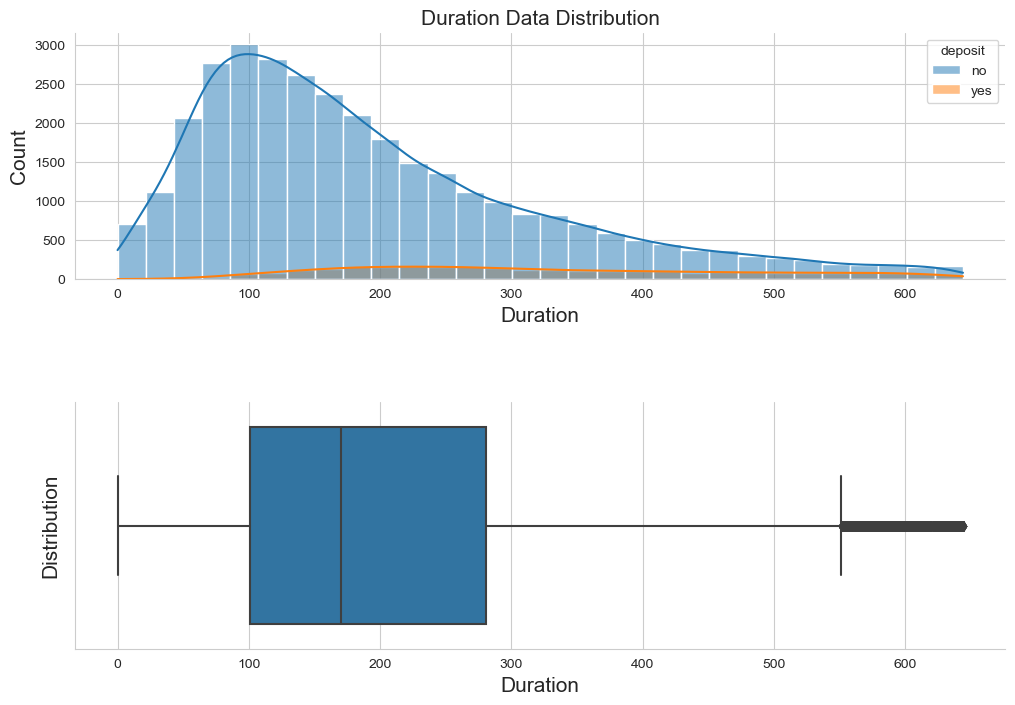

In [83]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8))

# Plot the first visualization in the top subplot
sns.histplot(x='duration', hue='deposit', data=train_df, bins=30, kde=True, ax=ax1)
ax1.set_xlabel('Duration', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.set_title('Duration Data Distribution', fontsize=15)
sns.despine()

# Plot the second visualization in the bottom subplot
sns.boxplot(x='duration', data=train_df, ax=ax2)
ax2.set_xlabel('Duration', fontsize=15)
ax2.set_ylabel('Distribution', fontsize=15)
sns.despine()

# Add some space between the subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()

Berdasarkan boxplot dan distribusi dari kolom duration, dapat terlihat bahwa durasi dapat menjadi fitur yang cukup berpengaruh terhadap prediksi campaign. Terlihat bahwa durasi telepon yang lebih panjang dapat membuat nasabah menerima penawaran deposito, yang dimana telepon berada pada rentang 0 - 1000 detik (kurang lebih 16 menit).

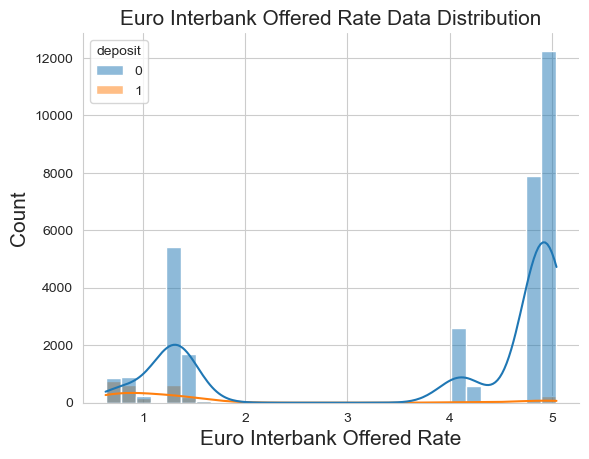

In [119]:
# Euro Interbank Offered Rate Data Distribution
fig.set_size_inches(20, 8)
ax=sns.histplot(x = 'euribor3m',hue = 'deposit', data =  train_df,bins=30, kde=True)
ax.set_xlabel('Euro Interbank Offered Rate', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Euro Interbank Offered Rate Data Distribution', fontsize=15)
sns.despine()

* Euribor3m adalah suku bunga yang digunakan sebagai acuan untuk pinjaman antar bank di zona Euro dengan jangka waktu 3 bulan
* Data pada euribor3m terlihat distribusi tidak merata, dengan jumlah customer deposit memiliki nilai tertinggi saat nilai euro di angka 1.

### Correlation

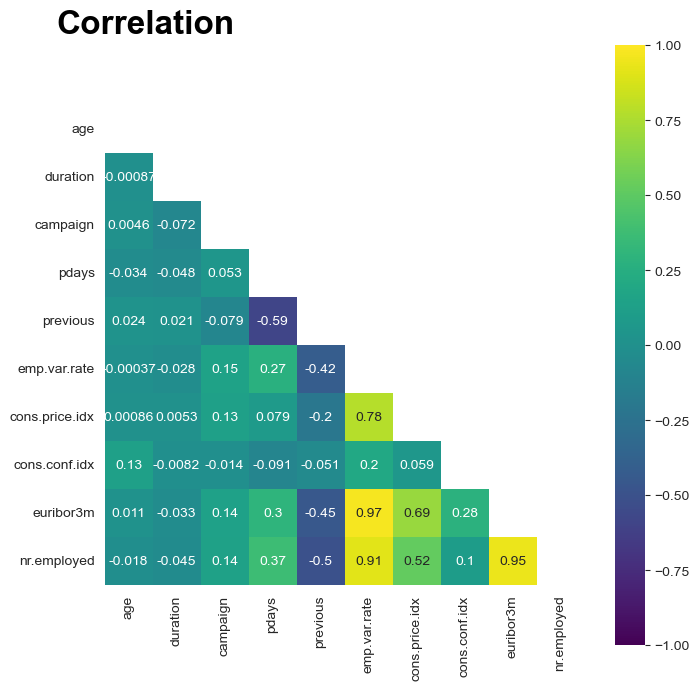

In [85]:
# fig
fig= plt.figure(figsize=(6, 6))

# mask
mask = np.triu(train_df.corr())

# axes 
axes = fig.add_axes([0, 0, 1, 1])
sns.heatmap(df.dropna().corr(), annot=True, mask=mask, square=True,fmt='.2g',vmin=-1, vmax=1, center= 0, cmap='viridis',
            linecolor='white', cbar_kws= {'orientation': 'vertical'}, ax=axes) 

# title
axes.text(-1, -1.5, 'Correlation', color='black', fontsize=24, fontweight='bold')

fig.show()

Dari dataset ini terdapat korelasi tertinggi antar fitur yaitu seperti `euribor3m` dengan `emp.var.rate`, kemudian `nr.employee` dengan `euribor3m` dan juga dengan `emp.var.rate` 

# **Data Preparation**

In [86]:
train_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic 4y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high school,unknown,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high school,no,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin,married,basic 6y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high school,no,no,yes,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,admin,married,university degree,no,yes,no,cellular,nov,fri,...,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic 4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional course,no,no,no,cellular,nov,fri,...,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university degree,no,yes,no,cellular,nov,fri,...,2,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


Sekarang kita akan melakukan fitur encoding untuk fitur-fitur kategorikal. Yang akan kita lakukan adalah:
1. Merubah kolom `job` menggunakan Binary Encoding, karena fitur ini tidak memiliki urutan tetapi jumlah unique data cukup banyak, yaitu 12.
2. Merubah kolom `marital` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan dan jumlah unique datanya sedikit.
3. Merubah kolom `education` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan dan jumlah unique datanya sedikit.
4. Merubah kolom `default` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan dan jumlah unique datanya sedikit.
5. Merubah kolom `housing` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan dan jumlah unique datanya sedikit.
6. Merubah kolom `contact` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan dan jumlah uniqe datanya sedikit.
7. Merubah kolom `month` menggunakan Ordinal Encoding, dikarenakan bulan memiliki urutan yang jelas.
8. Merubah kolom `day_of_week` menggunakan One Hot Encoding, karena walaupun hari memiliki urutan, tetapi menurut kami urutan tersebut tidak akan mempengaruhi signifikan keputusan nasabah menerima tawaran.
9. Merubah kolom `poutcome` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan dan jumlah unique datanya sedikit.

## Feature Engineering

In [87]:
# Mengubah data pada kolom target menjadi 0 dan 1
train_df['deposit'] = train_df['deposit'].replace({'yes': 1, 'no': 0})

In [88]:
# Mengubah value dari kolom month menjadi angka
ordinal_mapping = [
    {'col':'month',
     'mapping': {
         'mar': 3,
         'apr': 4,
         'may': 5,
         'jun': 6,
         'jul': 7,
         'aug': 8,
         'sep': 9,
         'oct': 10,
         'nov': 11,
         'dec': 12
     }}
]

In [89]:
transformer = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(), ['marital','education','default','housing','loan','contact','poutcome','day_of_week']),
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ['month']),
    ('binary', ce.BinaryEncoder(), ['job'])
], remainder= 'passthrough')

## Data Splitting

In [90]:
x = train_df.drop(columns=['deposit'])
y = train_df['deposit']

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state= 0)

# **Modeling and Evaluation**

In [92]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

## Model Benchmarking : Train Data

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold
import pandas as pd

models = [logreg, knn, tree, rf, xgb, lgbm]
score = []
rata = []
std = []

pipeline_obj = Pipeline([
    ('preprocess', transformer),
    ('model', None)
])

for i in models:
    skfold = StratifiedKFold(n_splits=5)
    pipeline_obj.steps[-1] = ('model', i)
    model_cv = cross_val_score(pipeline_obj, x_train, y_train, cv=skfold, scoring='precision', error_score='raise')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())

pd.DataFrame({
    'model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
    'mean precision': rata,
    'std dev': std
}).set_index('model').sort_values(by='mean precision', ascending=False)


,mean precision,std dev
model,,
Random Forest,0.679842,0.022240
LightGBM,0.667290,0.010796
Logistic Regression,0.648532,0.024180
XGBoost,0.640125,0.013853
KNN,0.582407,0.016651
Decision Tree,0.486634,0.008967


Berdasarkan nilai Precision terlihat bahwa model RandomForest adalah yang terbaik untuk nilai precision nya dari setiap model yang menggunakan default hyperparameter.

## Model Benchmarking : Test Data

In [94]:
models = [logreg,knn,tree,rf,xgb,lgbm]
score_precision = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict(x_test)
    score_precision.append(precision_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
             'precision score':score_precision}).set_index('model').sort_values(by='precision score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      6530
           1       0.66      0.34      0.45       575

    accuracy                           0.93      7105
   macro avg       0.80      0.66      0.71      7105
weighted avg       0.92      0.93      0.92      7105

KNN 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      6530
           1       0.59      0.38      0.47       575

    accuracy                           0.93      7105
   macro avg       0.77      0.68      0.71      7105
weighted avg       0.92      0.93      0.92      7105

Decision Tree 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      6530
           1       0.45      0.47      0.46       575

    accuracy                           0.91      7105
   macro avg       0.70      0.71      0.71      7105
weighted avg       0.91      0

,precision score
model,
Random Forest,0.677922
LightGBM,0.668904
Logistic Regression,0.662162
XGBoost,0.643923
KNN,0.592493
Decision Tree,0.451667


Hasil dari benchmarking dari beberapa model pada data test, terlihat RandomForest masih merupakan model terbaik dan terlihat nilai precision meningkat sedikit.

In [95]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [96]:
K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

In [97]:
data = x_train
target = y_train

In [98]:
from imblearn.pipeline import Pipeline

train_errors_without_oversampling = []
validation_errors_without_oversampling = []

train_errors_with_oversampling = []
validation_errors_with_oversampling = []

for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]
    
    # instantiate model
    rf = RandomForestClassifier()
    sm = SMOTE()

    estimator_sm=Pipeline([
        ('preprocess',transformer),
        ('oversampler', sm),
        ('model',rf)
    ])

    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',rf)
    ])

    #calculate errors
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(X_train, Y_train, X_val, Y_val, estimator)
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_train, Y_train, X_val, Y_val, estimator_sm)
    
    # append to appropriate list
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)
    
    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)

## Evaluation Metrics without Oversampling

In [99]:
listItem = []

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.999961,0.940535,1.0,0.953981,0.999869,0.765701,0.999517,0.475983,1.0,0.689873
1,1.000000,0.938072,1.0,0.946608,1.000000,0.755411,1.000000,0.456522,1.0,0.673077
2,1.000000,0.942294,1.0,0.938311,1.000000,0.773176,1.000000,0.486957,1.0,0.708861
3,0.999961,0.940887,1.0,0.953365,0.999868,0.764262,0.999516,0.465217,1.0,0.703947
4,1.000000,0.936312,1.0,0.946859,1.000000,0.744154,1.000000,0.430435,1.0,0.664430
5,1.000000,0.938072,1.0,0.941591,1.000000,0.755411,1.000000,0.456522,1.0,0.673077
6,0.999961,0.932794,1.0,0.946842,0.999868,0.730019,0.999516,0.408696,1.0,0.630872
7,1.000000,0.937720,1.0,0.946082,1.000000,0.747330,1.000000,0.430435,1.0,0.682759
8,1.000000,0.939479,1.0,0.944901,1.000000,0.752627,1.000000,0.434783,1.0,0.704225
9,1.000000,0.940162,1.0,0.948363,1.000000,0.760284,1.000000,0.458515,1.0,0.695364


## Evaluation Metrics with Oversampling

In [100]:
listItem = []

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.999922,0.937368,1.0,0.948797,0.999737,0.758422,0.999033,0.475983,1.0,0.652695
1,1.000000,0.935609,1.0,0.940202,1.000000,0.754501,1.000000,0.473913,1.0,0.637427
2,0.999961,0.938776,1.0,0.936974,0.999868,0.764948,0.999516,0.486957,1.0,0.666667
3,1.000000,0.942998,1.0,0.955160,1.000000,0.777007,1.000000,0.495652,1.0,0.712500
4,1.000000,0.934201,1.0,0.947858,1.000000,0.746799,1.000000,0.456522,1.0,0.628743
5,1.000000,0.935961,1.0,0.942564,1.000000,0.756404,1.000000,0.478261,1.0,0.639535
6,1.000000,0.933146,1.0,0.944675,1.000000,0.742136,1.000000,0.447826,1.0,0.620482
7,1.000000,0.934553,1.0,0.943690,1.000000,0.739004,1.000000,0.426087,1.0,0.644737
8,1.000000,0.937016,1.0,0.940331,1.000000,0.758755,1.000000,0.478261,1.0,0.650888
9,1.000000,0.940162,1.0,0.953359,1.000000,0.765989,1.000000,0.480349,1.0,0.683230


Kita dapat melihat bahwa pada hasil evaluation metrics untuk nilai rata-rata precision menurun setelah dilakukan oversampling dibandingkan dengan data yang tidak oversampling. Dengan itu kita akan melakukan modelling tanpa oversampling SMOTE.


## Hyperparameter Tuning

In [101]:
rf = RandomForestClassifier()

estimator=Pipeline([
    ('preprocess', transformer),
    ('model', rf)
])

In [102]:
# Hyperparameter RandomForest
hyperparam_space={
        'model__n_estimators': list(np.arange(1,11)),
        'model__max_depth': [3,6,9],
        'model__min_samples_split': list(np.arange(2,21)),
        'model__min_samples_leaf': list(np.arange(1,21))
}

In [103]:
# Hyperparameter tuning
random = RandomizedSearchCV(
    estimator, 
    param_distributions= hyperparam_space,
    n_iter = 250,
    cv = 10, 
    scoring = 'precision', 
    n_jobs = -1
)

In [104]:
random.fit(x_train, y_train)
print(random.best_score_)
print(random.best_params_)

0.8070193233273312
{'model__n_estimators': 9, 'model__min_samples_split': 5, 'model__min_samples_leaf': 6, 'model__max_depth': 3}


In [105]:
best_model = random.best_estimator_
best_model.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['marital', 'education',
                                                   'default', 'housing', 'loan',
                                                   'contact', 'poutcome',
                                                   'day_of_week']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'month',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': mar     3
apr     4
may     5
jun     6
jul     7
aug     8
sep     9
oct    10
nov    11
dec    12
dtype: int64}]),
                                                  ['month']),
                 

In [106]:
estimator=Pipeline([
    ('preprocess',transformer),
    ('model', rf)
])
estimator.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['marital', 'education',
                                                   'default', 'housing', 'loan',
                                                   'contact', 'poutcome',
                                                   'day_of_week']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'month',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': mar     3
apr     4
may     5
jun     6
jul     7
aug     8
sep     9
oct    10
nov    11
dec    12
dtype: int64}]),
                                                  ['month']),
                 

In [107]:
y_pred_default = estimator.predict(x_test)
y_pred_proba_default = estimator.predict(x_test)
y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict(x_test)

precision_default = precision_score(y_test, y_pred_proba_default)
precision_tuned = precision_score(y_test, y_pred_proba_tuned)

print('Precision Score Default RandomForest : ', precision_default)
print('Precision Score Tuned RandomForest : ', precision_tuned)

Precision Score Default RandomForest :  0.6563307493540051
Precision Score Tuned RandomForest :  0.8315789473684211


In [108]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default RandomForest : \n', report_default)
print('Classification Report Tuned RandomForest : \n', report_tuned)

Classification Report Default RandomForest : 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      6530
           1       0.66      0.44      0.53       575

    accuracy                           0.94      7105
   macro avg       0.80      0.71      0.75      7105
weighted avg       0.93      0.94      0.93      7105

Classification Report Tuned RandomForest : 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      6530
           1       0.83      0.14      0.24       575

    accuracy                           0.93      7105
   macro avg       0.88      0.57      0.60      7105
weighted avg       0.92      0.93      0.90      7105



## Confusion Matrix

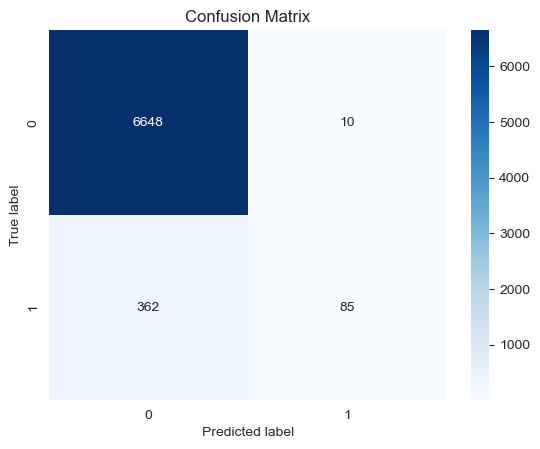

In [109]:
cm = confusion_matrix(y_pred, y_pred_tuned)

# Plot confusion matrix sebagai heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.show()

* True positives (TP): Jumlah instance yang diprediksi oleh model sebagai positif dengan benar. Dalam kasus ini, model dengan benar memprediksi 85 instance sebagai positif.

* False positives (FP): Jumlah instance yang diprediksi oleh model sebagai positif secara tidak benar, padahal seharusnya negatif. Dalam kasus ini, model memprediksi 10 instance sebagai positif, tetapi sebenarnya negatif.

* True negatives (TN): Jumlah instance yang diprediksi oleh model sebagai negatif dengan benar. Dalam kasus ini, model dengan benar memprediksi 6648 instance sebagai negatif.

* False negatives (FN): Jumlah instance yang diprediksi oleh model sebagai negatif secara tidak benar, padahal seharusnya positif. Dalam kasus ini, model memprediksi 362 instance sebagai negatif, tetapi sebenarnya positif.

Precision adalah ukuran seberapa banyak instance yang diprediksi sebagai positif yang benar-benar positif.

Precision = TP / (TP + FP) = 85 / (85 + 10) = 0,895

Ini berarti bahwa model memiliki precision sebesar 89,5%, yang menunjukkan bahwa ketika model memprediksi suatu target sebagai positif, prediksinya benar sebesar 89,5%.

## Feature Importance

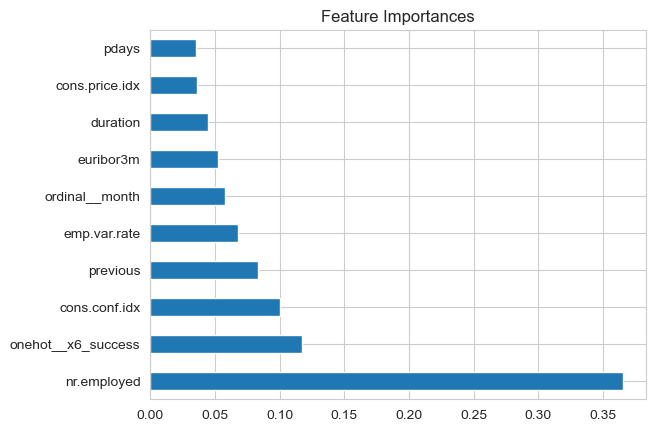

In [110]:
feat_imp = pd.Series(best_model['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending=False).head(10)
feat_imp.plot(kind='barh', title='Feature Importances')
plt.show()

# **Conclusion & Recommendation**

## Conclusion

In [112]:
print('Classification Report Tuned RandomForest : \n', report_tuned)

Classification Report Tuned RandomForest : 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      6530
           1       0.83      0.14      0.24       575

    accuracy                           0.93      7105
   macro avg       0.88      0.57      0.60      7105
weighted avg       0.92      0.93      0.90      7105



Dengan berdasarkan hasil analysis yang telah dibuat dapat disimpulkan bahwa perusahaan masih belum mengetahui target market seperti apa yang potensial untuk campaign mereka maka dari itu kami dapat menyimpulkan bahwa target market yang potensial untuk perusahaan ialah seperti : 

*   Range Usia 31-40
*   Pekerjaan sebagai Admin, Teknisi, Blue-Collar
*   Berstatus sudah menikah
*   Jenjang pendidikan telah lulus kuliah 
*   Memiliki skor kredit yang relatif tinggi
*   Yang tidak memiliki pinjaman terhadap berbagai lembaga keuangan, seperti bank, koperasi, atau institusi keuangan non-bank. 
*   Menentukan timing untuk campaign yang tepat contohnya pada saat kondisi ekonomi meningkat dapat dilakukan campaign secara besar-besaran.
*   Serta mengutamakan campaign kepada calon konsumen yang memiliki pekerjaan di big company, Karena jika calon konsumen bekerja di big company yang settle maka kemungkinan besar konsumen tersebut akan melakukan deposit karena berfikir bahwa tidak akan terjadi phk dalam waktu dekat.

Kemudian berdasarkan hasil classification report dari model kita, kita dapat menyimpulkan/mengambil konklusi bahwa bila seandainya nanti kita menggunakan model kita untuk memprediksi nasabah-nasabah yang akan kita coba tawarkan, maka model kita dapat mengurangi 93% nasabah-nasabah yang diprediksi menolak tawaran, dan model kita dapat mendapatkan ketepatan prediksi sebesar 83%, yang dimana apabila kita memprediksi seseorang akan menerima tawaran deposito, maka kemungkinan prediksinya bahwa nasabah itu benar akan menerima adalah sebesar 83%.

Apabila biaya telemarketing adalah EUR 0.5 per menit (sumber: https://www.worldwidecallcenters.com/call-center-pricing/) dan apabila jumlah nasabah yang akan kita tawarkan dalam campaign adalah 1000 orang (dengan permisalan 500 orang menerima dan 500 orang menolak) dan dengan rata-rata durasi telepon selama 10 menit, maka perhitungan penghematan biaya campaign adalah sebagai berikut:

Tanpa Model (Penawaran kepada seluruh nasabah):
- Total Biaya => 1000 x EUR 0.5 x 10 = EUR 5,000
- Total nasabah tertarik yang menerima => 100 orang
- Total nasabah tertarik yang tidak menerima => 0 orang
- Biaya yang terbuang => 500 x EUR 0.5 x 10 = EUR 2,500
- Jumlah penghematan => EUR 0

Dengan Model (Penawaran hanya kepada nasabah yang diprediksi akan menerima):
- Total Biaya => (415 x EUR 0.5 x 10) + (35 x EUR 0.5 x 10) = 2,075 + 175 = EUR 2,050
- Total nasabah tertarik yang menerima => 415 orang
- Total nasabah tertarik yang tidak menerima => 85 orang
- Biaya yang terbuang => 35 x EUR 0.5 x 10 = EUR 175
- Jumlah penghematan => 465 x EUR 0.5 x 10 = EUR 2,325

Berdasarkan asumsi tersebut, terlihat bahwa dengan menggunakan model kita, maka perusahaan tersebut akan menghemat biaya yang cukup besar tanpa mengorbankan terlalu banyak jumlah nasabah-nasabah yang akan menerima tawaran deposito, serta Bank sudah dapat mengetahui target market yang potensial bagi campaign mereka sehingga Bank dapat mengurangi biaya campaign dan campaign berjalan lebih efektif.

## Recommendation

Hal-hal yang bisa dilakukan untuk mengembangkan project dan modelnya lebih baik lagi:
  1. Lebih memfokuskan untuk melakukan campaign kepada target market yang telah 
dikerucutkan sesuai segmentasinya. 
  2. Serta dapat melakukan campaign sesuai dengan timing atau kondisi ekonomi negara tersebut sehingga jika memiliki momentum yang tepat tidak menutup kemungkinan jumlah konsumen yang akan melakukan deposit akan lebih baik.
  3. Kemudian dapat memberikan sebuah training bagi sales untuk dapat membuat duration call yang efektif dan optimal, karena dari data tersebut dapat disimpulkan bahwa jika memiliki duration call yang relatif singkat justru konsumen lebih banyak melakukan deposit, Serta mengutamakan melakukan campaign menggunakan cellular karena jumlah deposit tertinggi yaitu pada saat melakukan campaign menggunakan cellular, Hal ini juga termasuk detail kecil yang patut dipertimbangkan karena target market yang dimiliki oleh kami ialah konsumen dengan usia yang aktif sehingga lebih banyak mobile menggunakan celullar dibandingkan dengan telephone.
  1. Menambahkan fitur-fitur seperti jumlah saldo tabungan, berapa orang keluarga yang sedang ditanggung, berapa gaji yang didapatkan tiap bulannya (yang dimana menambah insight apabila dihubungkan dengan pekerjaan)
  2. Mencoba lebih banyak algoritma machine learning lain dan mencoba hyperparameter tuning dengan lebih banyak hyperparameter, dan mencoba menggunakan teknik oversampling lainnya seperti RandomOverSampler.
  